# PySPEDAS - PyHC Summer School 2022

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes(at)igpp.ucla.edu**

Notes:
- I tried to start at the Sun, and go all the way to the ground; so solar data are first and ground data are last
- For the most part, the data shown are from March 27, 2017; exceptions are Parker Solar Probe and Solar Orbiter (which had not launched yet, so more recent examples are used).
- Only a few data products are loaded/plotted for each spacecraft in this notebook, so not all spacecraft/instruments/data products are demonstrated. For a list of the capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

- Other Python in Heliophysics Community (PyHC) projects used in this notebook:

cdflib: https://cdflib.readthedocs.io/

PyTplot: https://pytplot.readthedocs.io/

Geopack: https://github.com/tsssss/geopack

To install the latest version of pyspedas available in PyPI:

In [ ]:
#!pip install pyspedas

To install the bleeding edge:

In [ ]:
#!pip install --upgrade https://github.com/spedas/pyspedas/archive/master.zip
#!pip install --upgrade https://github.com/MAVENSDC/PyTplot/archive/matplotlib-backend.zip

Get started by importing `pyspedas`

In [ ]:
import pyspedas

## Setting your local data directory

By default, data files are saved in a subfolder of your current working directory; you can change this by setting the `SPEDAS_DATA_DIR` environment variable. Directories for individual missions can also be changed from the default with mission-specific environment variables, e.g., `PSP_DATA_DIR` or `SOLO_DATA_DIR`



In [ ]:
import os
#os.environ['SPEDAS_DATA_DIR'] = '/shared/eric/data/'

The load routines in PySPEDAS all follow the form: pyspedas.mission.instrument(), and have the same core keywords for accessing data (trange, level, datatype, etc).

## Solar Orbiter

To find the supported load routines and keywords, see our documentation: https://pyspedas.readthedocs.io/

You can also see the supported options by calling `help` on the load routine you're interested in

In [ ]:
help(pyspedas.solo.mag)

Help on function mag in module pyspedas.solo:

mag(trange=['2020-06-01', '2020-06-02'], datatype='rtn-normal', level='l2', suffix='', get_support_data=False, varformat=None, varnames=[], downloadonly=False, notplot=False, no_update=False, time_clip=False)
    This function loads data from the Magnetometer (MAG)
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        datatype: str
            Data type; Valid options:
              'rtn-normal': RTN Coordinates in Normal Mode
              'rtn-normal-1-minute': Same as above, but at 1-min resolution
              'rtn-burst': RTN Coordinates in Burst Mode
              'srf-normal': Spacecraft Reference Frame in Normal Mode
              'srf-burst': Spacecraft Reference Frame in Burst Mode 
    
        level

To load the magnetic field data (RTN coordinates) for Solar Orbiter:

In [ ]:
pyspedas.solo.mag(trange=['2020-04-20/06:00', '2020-04-20/08:00'], 
                  time_clip=True)

12-May-22 19:21:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
12-May-22 19:21:28: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200420_v01.cdf to solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200420_v01.cdf
12-May-22 19:21:29: Download complete: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200420_v01.cdf


Time clip was applied to: B_RTN


['B_RTN']

To create a figure showing the B-field

In [ ]:
from pytplot import tplot

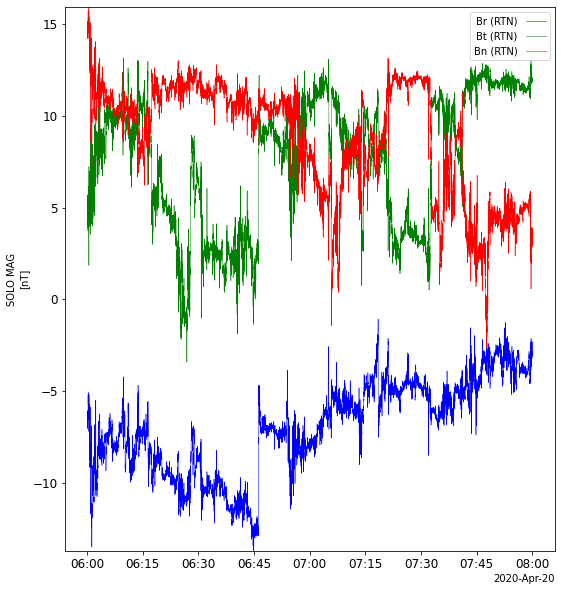

In [ ]:
tplot('B_RTN')

## Parker Solar Probe (PSP)

Set a timespan for four days near perihelion 2 and load magnetic field and Radio Frequency Spectrometer (RFS) data

This example time range was taken from the PSP FIELDS team's IDL example

In [ ]:
time_range = ['2019-04-03', '2019-04-03/12:00']

pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_hfr',
                    varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_lfr',
                    varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)

12-May-22 19:21:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
12-May-22 19:21:39: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
12-May-22 19:21:40: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
12-May-22 19:21:42: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/


Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc


12-May-22 19:21:42: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf
12-May-22 19:21:44: Download complete: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf
12-May-22 19:21:44: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_lfr/2019/


Time clip was applied to: psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2


12-May-22 19:21:44: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_lfr/2019/psp_fld_l2_rfs_lfr_20190403_v02.cdf to psp_data/fields/l2/rfs_lfr/2019/psp_fld_l2_rfs_lfr_20190403_v02.cdf
12-May-22 19:21:46: Download complete: psp_data/fields/l2/rfs_lfr/2019/psp_fld_l2_rfs_lfr_20190403_v02.cdf


Time clip was applied to: psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2


['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2']

Set some plot metadata and create the figure

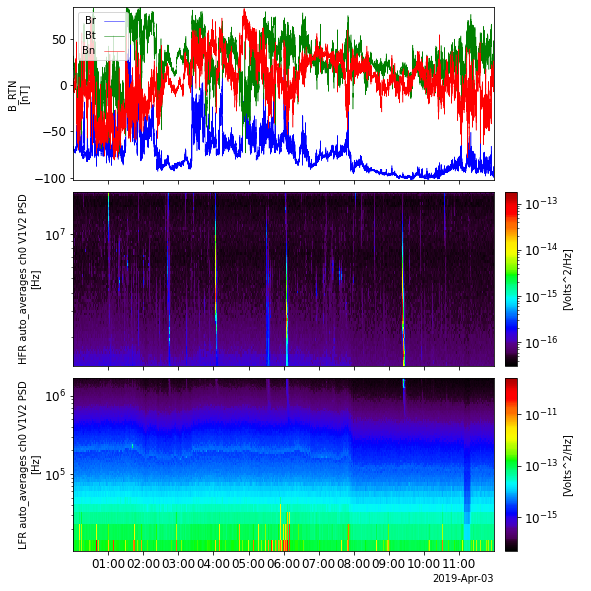

In [ ]:
from pytplot import options

options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'legend_names', ['Br', 'Bt', 'Bn'])

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'])

In [ ]:
trange = ['2017-03-27', '2017-03-28']

## Advanced Composition Explorer (ACE)

Load the magnetic field data measured by ACE

In [ ]:
pyspedas.ace.mfi(trange=trange)

12-May-22 19:21:55: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/
12-May-22 19:21:56: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf to ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
12-May-22 19:21:56: Download complete: ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf


['Magnitude', 'BRTN', 'BGSEc', 'BGSM']

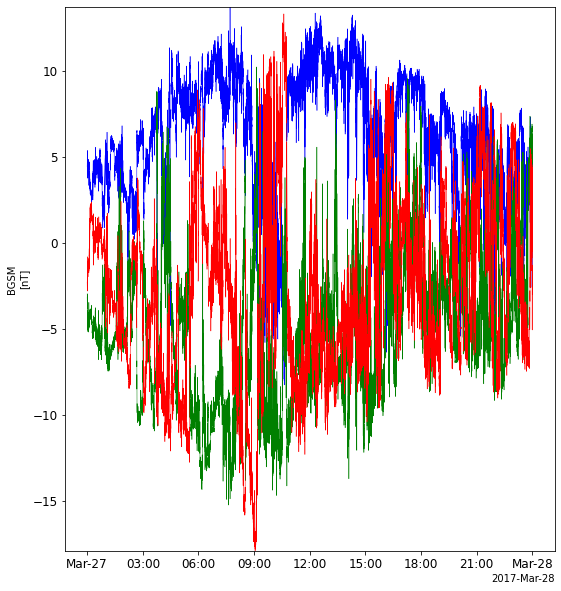

In [ ]:
tplot('BGSM')

Plot the B-field magnitude and vector in GSM coordinates

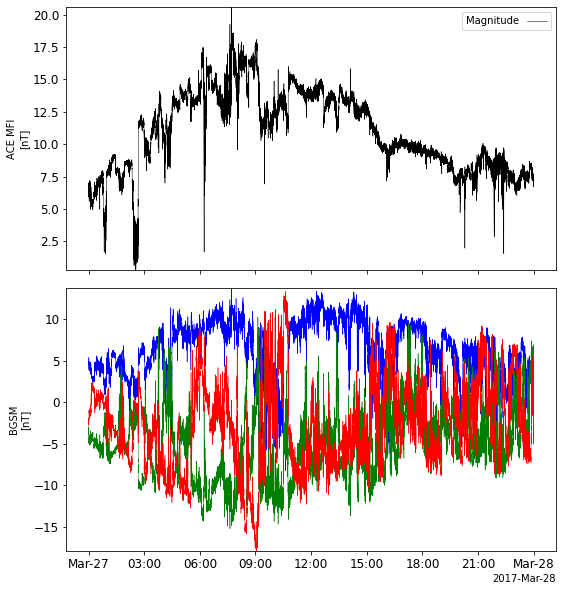

In [ ]:
tplot(['Magnitude', 'BGSM'])

Set the legend names in the vector panel

In [ ]:
options('BGSM', 'legend_names', ['Bx GSM', 'By GSM', 'Bz GSM'])

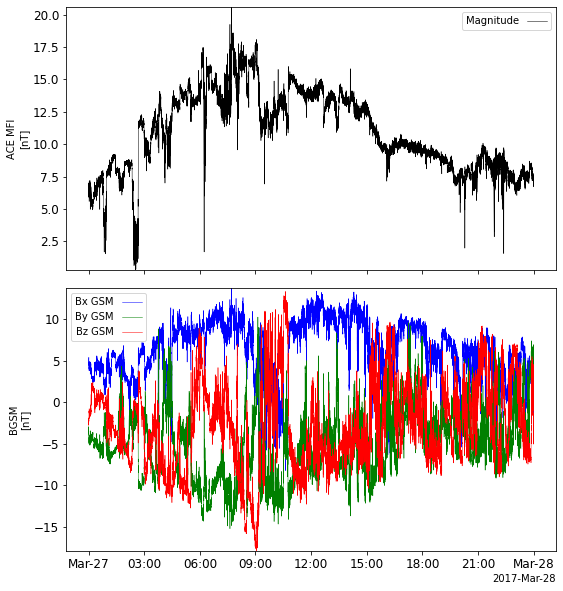

In [ ]:
tplot(['Magnitude', 'BGSM'])

Load data from the Solar Wind Electron, Proton and Alpha Monitor (SWEPAM) instrument

In [ ]:
pyspedas.ace.swe(trange=trange)

12-May-22 19:22:06: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/
12-May-22 19:22:06: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf to ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf
12-May-22 19:22:07: Download complete: ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf


['Np',
 'Vp',
 'Tpr',
 'alpha_ratio',
 'V_GSE',
 'V_RTN',
 'V_GSM',
 'SC_pos_GSE',
 'SC_pos_GSM']

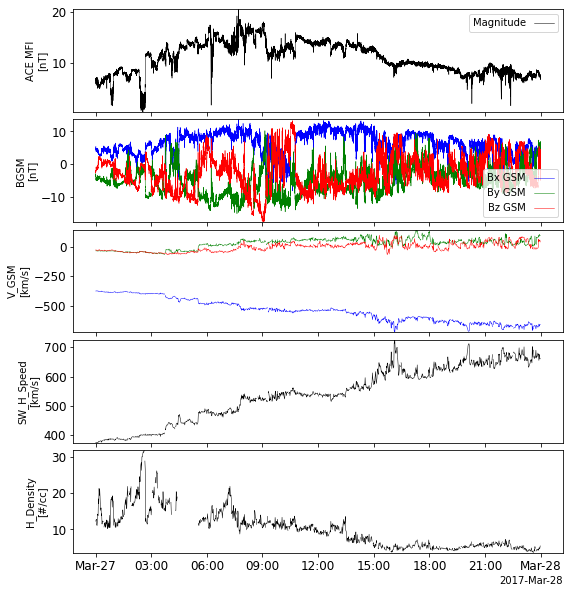

In [ ]:
tplot(['Magnitude', 'BGSM', 'V_GSM', 'Vp', 'Np'])

To change the size of the figure, use the `xsize` and/or `ysize` options in your call to the `tplot` function, e.g., 

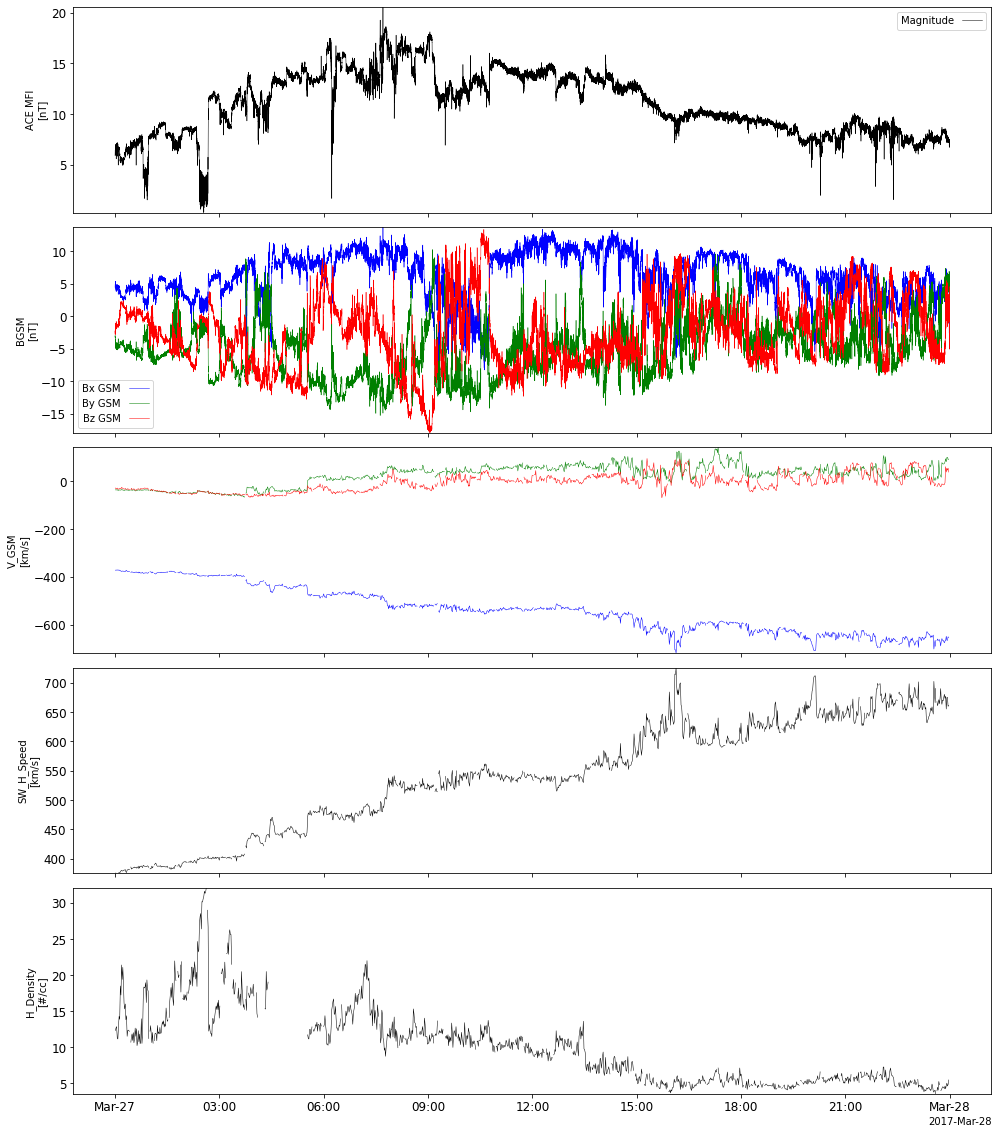

In [ ]:
tplot(['Magnitude', 'BGSM', 'V_GSM', 'Vp', 'Np'], xsize=15, ysize=20)

## Deep Space Climate Observatory (DSCOVR)

Load and plot the DSCOVR magnetic field data

In [ ]:
pyspedas.dscovr.mag(trange=trange)

12-May-22 19:22:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/
12-May-22 19:22:16: Downloading https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf to dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
12-May-22 19:22:17: Download complete: dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf


['dsc_h0_mag_B1F1',
 'dsc_h0_mag_B1SDF1',
 'dsc_h0_mag_B1GSE',
 'dsc_h0_mag_B1SDGSE',
 'dsc_h0_mag_B1RTN',
 'dsc_h0_mag_B1SDRTN']

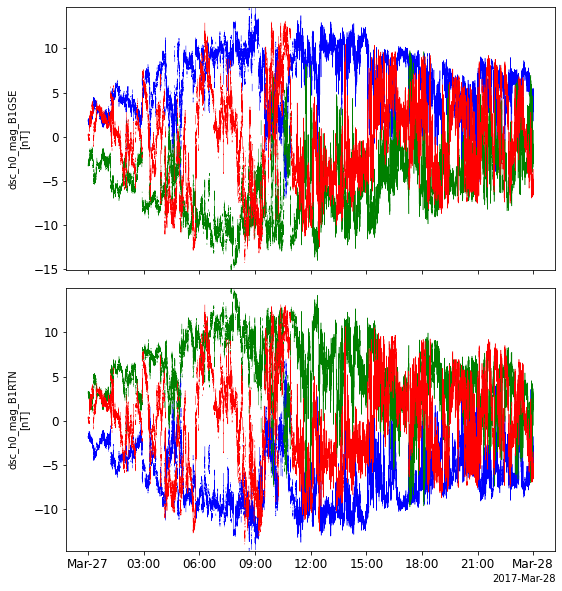

In [ ]:
tplot(['dsc_h0_mag_B1GSE', 'dsc_h0_mag_B1RTN'])

You can change the color of lines with the `color` option

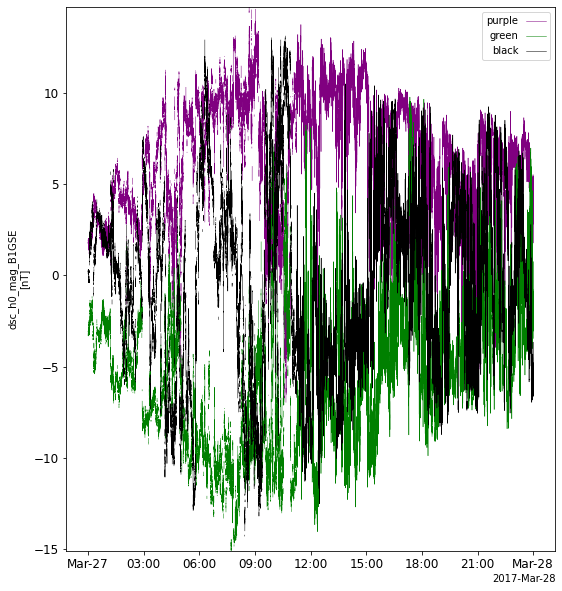

In [ ]:
options('dsc_h0_mag_B1GSE', 'color', ['purple', 'green', 'black'])
options('dsc_h0_mag_B1GSE', 'legend_names', ['purple', 'green', 'black'])

tplot('dsc_h0_mag_B1GSE')

## Solar Terrestrial Relations Observatory (STEREO)

Load the magnetic field data from STEREO

In [ ]:
pyspedas.stereo.mag(trange=trange)

12-May-22 19:22:24: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/
12-May-22 19:22:24: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf to stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
12-May-22 19:22:25: Download complete: stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf


['BFIELD']

The B-field variable doesn't have the coordinate system, but we can easily find it by looking at the metadata

In [ ]:
from pytplot import get_data

In [ ]:
ste_metadata = get_data('BFIELD', metadata=True)

ste_metadata['CDF']['VATT']

{'CATDESC': 'Magnetic field vector in RTN coordinates from the IMPACT/MAG instrument.',
 'DEPEND_0': 'Epoch',
 'DEPEND_1': 'CART_LABL_1',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'B Field in RTN Coordinates',
 'FILLVAL': -1e+31,
 'FORMAT': 'E13.6',
 'LABL_PTR_1': 'CART_LABL_1',
 'SCALETYP': 'linear',
 'UNITS': 'nT',
 'VALIDMAX': 1000000.0,
 'VALIDMIN': -10000.0,
 'VAR_TYPE': 'data'}

Load proton data from the PLAsma and SupraThermal Ion Composition (PLASTIC) instrument onboard STEREO

In [ ]:
pyspedas.stereo.plastic(trange=trange)

12-May-22 19:22:26: Downloading remote index: http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/
12-May-22 19:22:26: Downloading http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf to stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf
12-May-22 19:22:26: Download complete: stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf


The lengths of x and y do not match!
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.


['error',
 'caution',
 'attitude_flag',
 'ew_source_flag',
 'ew_boxcar',
 'proton_number_density',
 'proton_bulk_speed',
 'proton_temperature',
 'proton_thermal_speed',
 'proton_n_s_flow_angle_inst',
 'proton_e_w_flow_angle_inst',
 'proton_n_s_flow_angle_HERTN',
 'proton_e_w_flow_angle_HERTN',
 'proton_Vr_HERTN',
 'proton_Vt_HERTN',
 'proton_Vn_HERTN',
 'proton_n_s_flow_angle_RTN',
 'proton_e_w_flow_angle_RTN',
 'proton_Vr_RTN',
 'proton_Vt_RTN',
 'proton_Vn_RTN']

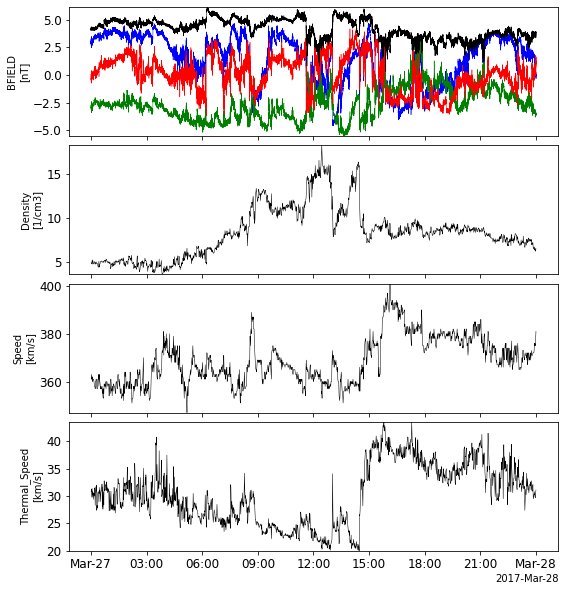

In [ ]:
tplot(['BFIELD', 'proton_number_density', 'proton_bulk_speed', 'proton_thermal_speed'])

To find the tplot variables that are currently loaded

In [ ]:
from pytplot import tplot_names

In [ ]:
tplot_names()

0 : B_RTN
1 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
2 : psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2
3 : psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2
4 : Magnitude
5 : BRTN
6 : BGSEc
7 : BGSM
8 : Np
9 : Vp
10 : Tpr
11 : alpha_ratio
12 : V_GSE
13 : V_RTN
14 : V_GSM
15 : SC_pos_GSE
16 : SC_pos_GSM
17 : dsc_h0_mag_B1F1
18 : dsc_h0_mag_B1SDF1
19 : dsc_h0_mag_B1GSE
20 : dsc_h0_mag_B1SDGSE
21 : dsc_h0_mag_B1RTN
22 : dsc_h0_mag_B1SDRTN
23 : BFIELD
24 : error
25 : caution
26 : attitude_flag
27 : ew_source_flag
28 : ew_boxcar
29 : proton_number_density
30 : proton_bulk_speed
31 : proton_temperature
32 : proton_thermal_speed
33 : proton_n_s_flow_angle_inst
34 : proton_e_w_flow_angle_inst
35 : proton_e_w_flow_angle_HERTN
36 : proton_Vr_HERTN
37 : proton_Vt_HERTN
38 : proton_Vn_HERTN
39 : proton_n_s_flow_angle_RTN
40 : proton_e_w_flow_angle_RTN
41 : proton_Vr_RTN
42 : proton_Vt_RTN
43 : proton_Vn_RTN


['B_RTN',
 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
 'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
 'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
 'Magnitude',
 'BRTN',
 'BGSEc',
 'BGSM',
 'Np',
 'Vp',
 'Tpr',
 'alpha_ratio',
 'V_GSE',
 'V_RTN',
 'V_GSM',
 'SC_pos_GSE',
 'SC_pos_GSM',
 'dsc_h0_mag_B1F1',
 'dsc_h0_mag_B1SDF1',
 'dsc_h0_mag_B1GSE',
 'dsc_h0_mag_B1SDGSE',
 'dsc_h0_mag_B1RTN',
 'dsc_h0_mag_B1SDRTN',
 'BFIELD',
 'error',
 'caution',
 'attitude_flag',
 'ew_source_flag',
 'ew_boxcar',
 'proton_number_density',
 'proton_bulk_speed',
 'proton_temperature',
 'proton_thermal_speed',
 'proton_n_s_flow_angle_inst',
 'proton_e_w_flow_angle_inst',
 'proton_e_w_flow_angle_HERTN',
 'proton_Vr_HERTN',
 'proton_Vt_HERTN',
 'proton_Vn_HERTN',
 'proton_n_s_flow_angle_RTN',
 'proton_e_w_flow_angle_RTN',
 'proton_Vr_RTN',
 'proton_Vt_RTN',
 'proton_Vn_RTN']

Use `get_data` from `pytplot` to access the times and data values

In [ ]:
data = get_data('proton_number_density')

In [ ]:
data

variable(times=array([1.49057285e+09, 1.49057291e+09, 1.49057297e+09, ...,
       1.49065907e+09, 1.49065913e+09, 1.49065919e+09]), y=array([4.91, 4.89, 4.78, ..., 6.23, 6.25, 6.51], dtype=float32))

To create a new tplot variable, use `store_data` from `pytplot`


Note: the time values are stored in `x`, the data values are stored in `y`. For spectra variables, `data.y` contains the data values (z-axis), and  `data.v` contains the y-axis values at each point

In [ ]:
from pytplot import store_data

store_data('ste_proton_n', data={'x': data.times, 'y': data.y})

True

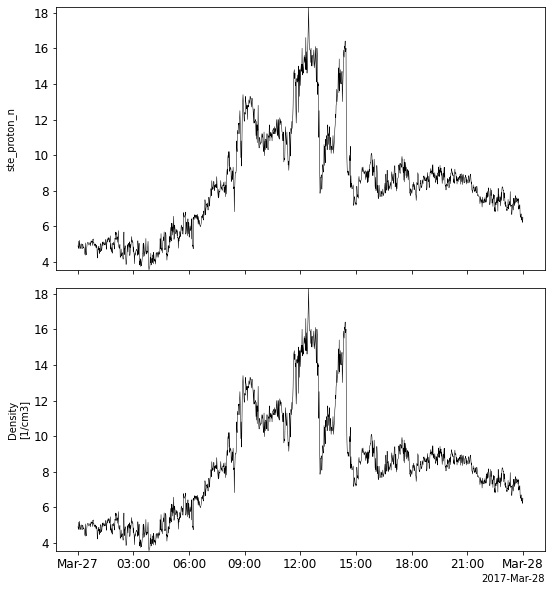

In [ ]:
tplot(['ste_proton_n', 'proton_number_density'])

## OMNI

To load OMNI data for the full month of March, 2017

In [ ]:
pyspedas.omni.data(trange=['2017-03-01', '2017-04-01'], time_clip=False)

12-May-22 19:22:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/
12-May-22 19:22:49: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf to omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf
12-May-22 19:22:50: Download complete: omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

You can join vector components into a single variable using `join_vec` from `pytplot`

In [ ]:
from pytplot import join_vec

In [ ]:
join_vec(['BX_GSE', 'BY_GSE', 'BZ_GSE'], new_tvar='B_GSE')

'B_GSE'

Find the coordinate system of the velocity by checking the metadata

In [ ]:
metadata = get_data('Vx', metadata=True)

In [ ]:
metadata['CDF']['VATT']

{'CATDESC': 'Vx Velocity (km/s), GSE',
 'DEPEND_0': 'Epoch',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'Vx Velocity, GSE',
 'FILLVAL': 99999.9,
 'FORMAT': 'F7.1',
 'LABLAXIS': 'Vx Velocity, GSE',
 'SCALEMAX': 2000.0,
 'SCALEMIN': -2000.0,
 'UNITS': 'km/s',
 'VALIDMAX': 2000.0,
 'VALIDMIN': -2000.0,
 'VAR_TYPE': 'data'}

In [ ]:
join_vec(['Vx', 'Vy', 'Vz'], new_tvar='V_GSE')

'V_GSE'

Add the legend names:

In [ ]:
options('B_GSE', 'legend_names', ['Bx GSE', 'By GSE', 'Bz GSE'])
options('V_GSE', 'legend_names', ['Vx GSE', 'Vy GSE', 'Vz GSE'])

Plot the B-field, solar wind velocity, flow speed, proton ensity and SYM-H

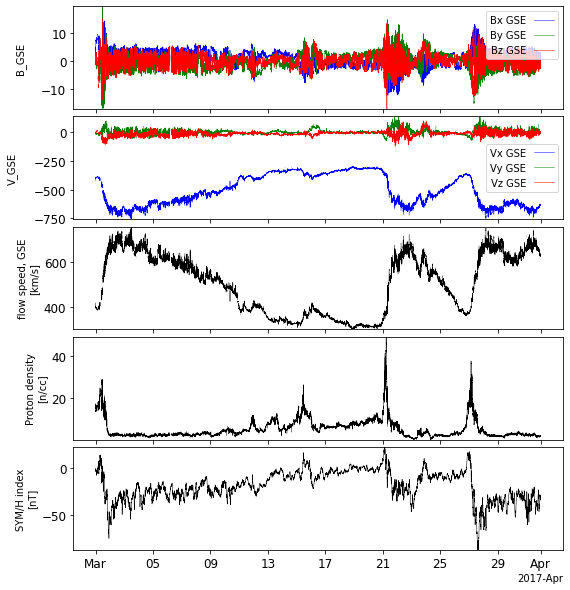

In [ ]:
tplot(['B_GSE', 'V_GSE', 'flow_speed', 'proton_density', 'SYM_H'])

Set the units on the B-field and velocity vector, and change the proton density to a log scale

In [ ]:
options('B_GSE', 'ysubtitle', '[nT]')
options('V_GSE', 'ysubtitle', '[km/s]')
options('proton_density', 'ylog', True)

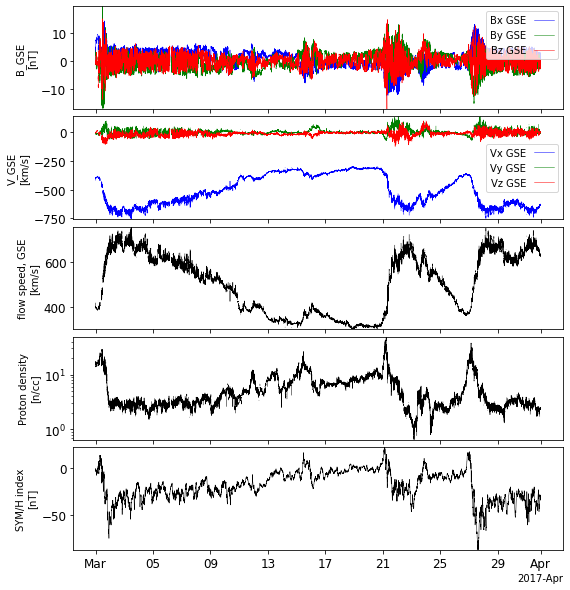

In [ ]:
tplot(['B_GSE', 'V_GSE', 'flow_speed', 'proton_density', 'SYM_H'])

The opposite of `join_vec` is `split_vec`

In [ ]:
from pytplot import split_vec

In [ ]:
split_vec('V_GSE')

['V_GSE_x', 'V_GSE_y', 'V_GSE_z']

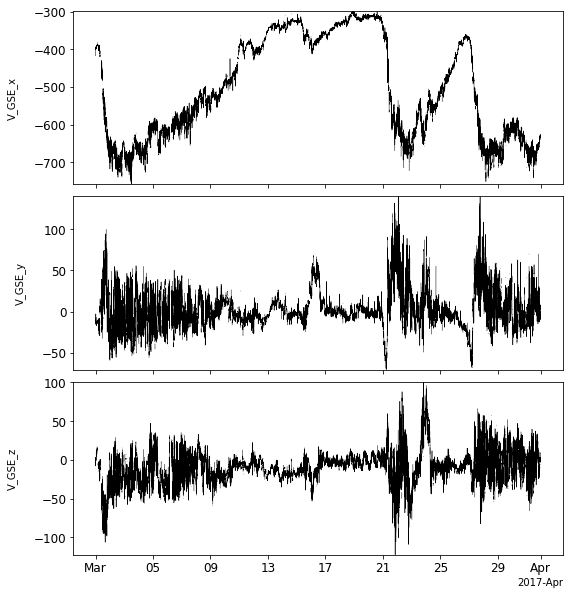

In [ ]:
tplot(['V_GSE_x', 'V_GSE_y', 'V_GSE_z'])

You can do coordinate transformations with the `cotrans` routine, e.g., 

In [ ]:
from pyspedas import cotrans

cotrans(name_in='V_GSE', name_out='V_GSM', coord_in='gse', coord_out='gsm')

['gse', 'gsm']
Running transformation: subgse2gsm
Output variable: V_GSM


1

Now plot the velocity in GSE and GSM coordinates

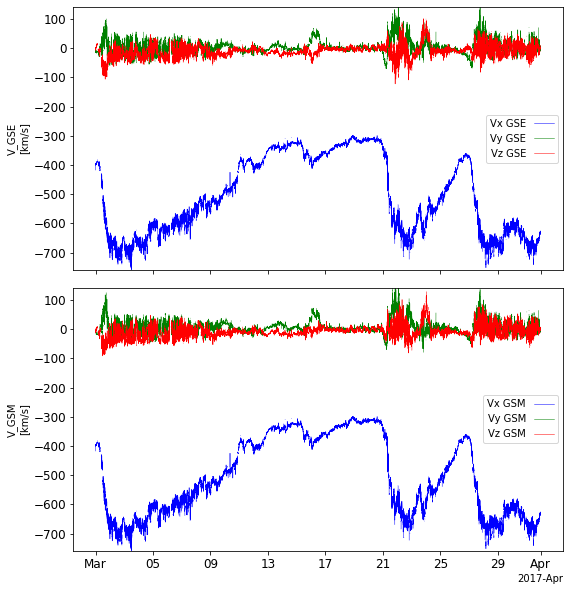

In [ ]:
tplot(['V_GSE', 'V_GSM'])

## Kyoto Dst

To load the Kyoto Dst data for the full month of March 2017:

In [ ]:
pyspedas.kyoto.dst(trange=['2017-03-01', '2017-04-01'])

Time clip returns full data set.
**************************************************************************************
The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
 are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
 the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
 [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
 make the Dst index available.
**************************************************************************************


'kyoto_dst'

Plot the Dst and Sym-H data

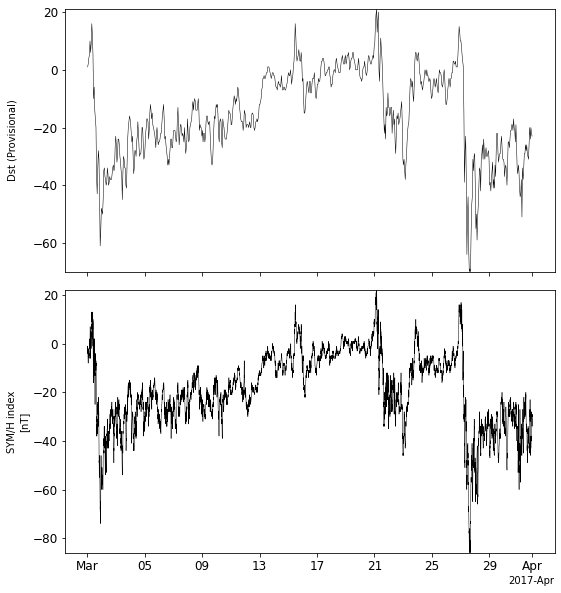

In [ ]:
tplot(['kyoto_dst', 'SYM_H'])

You can also create a pseudo variable containing Dst and Sym-H data:

In [ ]:
store_data('dst_and_symh', data=['kyoto_dst', 'SYM_H'])

True

Now plot the Dst and Sym-H data in the same panel

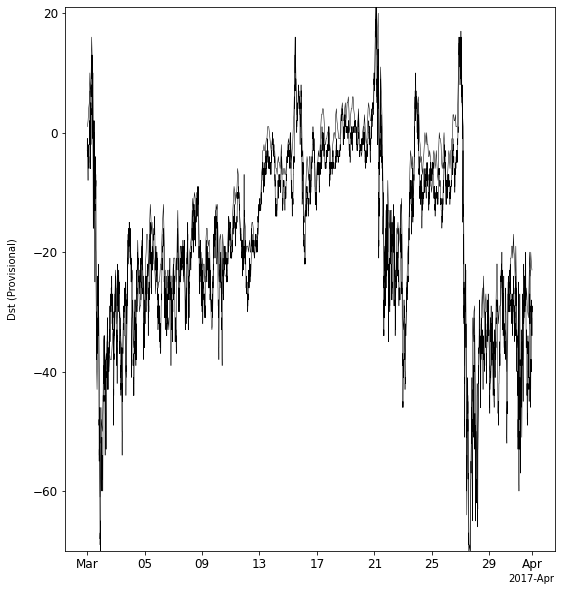

In [ ]:
tplot('dst_and_symh')

Set some plot metadata for the pseudo variable

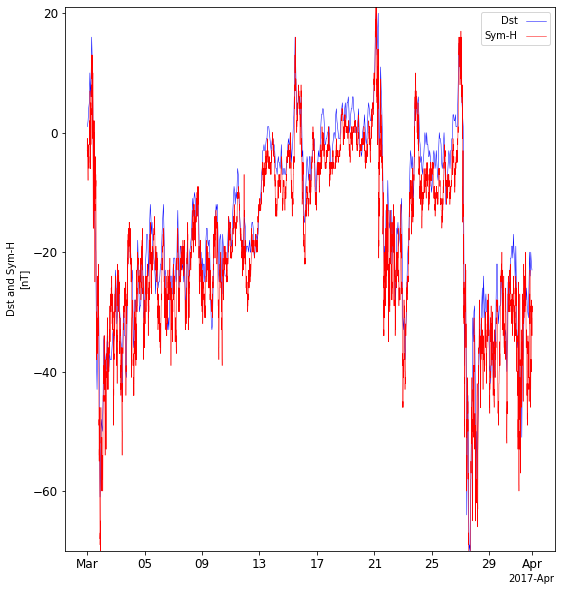

In [ ]:
options('dst_and_symh', 'ytitle', 'Dst and Sym-H')
options('dst_and_symh', 'ysubtitle', '[nT]')
options('dst_and_symh', 'color', ['blue', 'red'])
options('dst_and_symh', 'legend_names', ['Dst', 'Sym-H'])

tplot('dst_and_symh')

## Geotail

Load magnetic field data measured by Geotail

In [ ]:
pyspedas.geotail.mgf(trange=trange)

12-May-22 19:23:11: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/
12-May-22 19:23:11: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf to geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
12-May-22 19:23:12: Download complete: geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf


['Epoch',
 'Time_PB5',
 'MSEC',
 'IB',
 'IB_vector',
 'IS_vector',
 'RANGE_STATUS',
 'POS',
 'DQF',
 'Gap_Flag']

Now load data from the Comprehensive Plasma Instrumentation (CPI)

In [ ]:
pyspedas.geotail.cpi(trange=trange)

12-May-22 19:23:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/
12-May-22 19:23:12: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf to geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf
12-May-22 19:23:12: Download complete: geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf


['SW_P_Den',
 'SW_P_AVGE',
 'SW_V',
 'HP_P_Den',
 'HP_P_AVGE',
 'HP_V',
 'HP_E_AVGE',
 'W',
 'H_P_FLAG',
 'HE_PP_FLAG',
 'HE_P_FLAG',
 'O_P_FLAG']

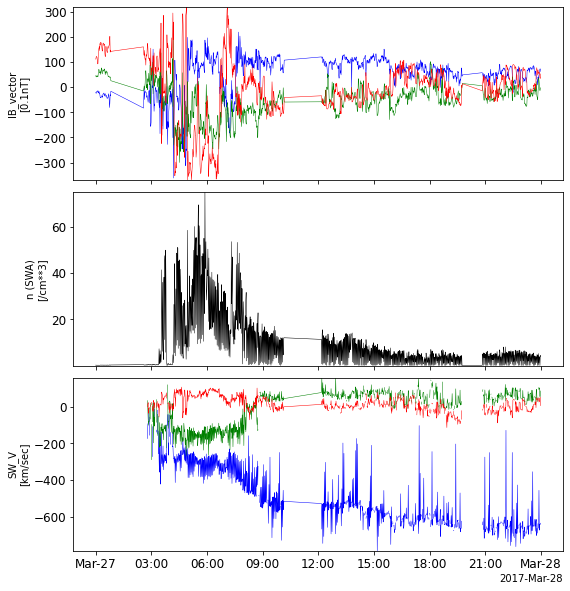

In [ ]:
tplot(['IB_vector', 'SW_P_Den', 'SW_V'])

Return the data in `numpy` arrays

In [ ]:
sw_v = get_data('SW_V')

The time values (unix times, in UTC) are in `.times`

In [ ]:
sw_v.times

array([1.49057283e+09, 1.49057290e+09, 1.49057296e+09, ...,
       1.49065901e+09, 1.49065907e+09, 1.49065913e+09])

The data values are in `.y`

In [ ]:
sw_v.y

array([[        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       ...,
       [        nan,         nan,         nan],
       [-641.91046 ,   54.844635,    5.455169],
       [-635.2512  ,   85.45288 ,   51.204845]], dtype=float32)

You can then use the `numpy` `ndarray` methods to work with these data, e.g., to find the shape of the data:

In [ ]:
sw_v.y.shape

(1069, 3)

To access a vector at a single time:

In [ ]:
sw_v.times[100]

1490585635.875

In [ ]:
sw_v.y[100, :]

array([-311.1197 , -107.81671,   79.44762], dtype=float32)

You can convert from unix times to strings using `time_string`

In [ ]:
from pyspedas import time_string

time_string(sw_v.times[0])

'2017-03-27 00:00:32.875000'

This also works on arrays, e.g., 

In [ ]:
time_string(sw_v.times[0:5])

['2017-03-27 00:00:32.875000',
 '2017-03-27 00:01:36.875000',
 '2017-03-27 00:02:40.875000',
 '2017-03-27 00:03:44.875000',
 '2017-03-27 00:05:52.875000']

And convert back using `time_double`:

In [ ]:
from pyspedas import time_double

time_double(['2017-03-27 00:00:32.875000',
             '2017-03-27 00:01:36.875000',
             '2017-03-27 00:02:40.875000',
             '2017-03-27 00:03:44.875000',
             '2017-03-27 00:05:52.875000'])

[1490572832.875,
 1490572896.875,
 1490572960.875,
 1490573024.875,
 1490573152.875]

And convert to datetime objects using `time_datetime`

Important note: if you work with `datatime` objects, be sure to set the time zone to UTC! This is done automatically by `time_datetime`, but other `datetime` objects you work with will also need to have their time zone set properly

In [ ]:
from pyspedas import time_datetime

time_datetime(sw_v.times[0])

datetime.datetime(2017, 3, 27, 0, 0, 32, 875000, tzinfo=datetime.timezone.utc)

For more examples of working with dates and times in PySPEDAS, please see the notebook:

https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Working_with_dates_and_times_with_PySPEDAS_PyTplot.ipynb

## Magnetospheric Multiscale (MMS)

Load Ephemeris / Coordinates data from MMS

Note: the first time you load MMS data, you'll be prompted for a username/password; leaving the username blank will give you access to the public (L2) data

In [ ]:
pyspedas.mms.mec(trange=trange)

SDC username (blank for public access): 


12-May-22 19:23:16: /usr/local/lib/python3.7/dist-packages/pyspedas/mms/mms_login_lasp.py:69: ResourceWarning: unclosed file <_io.BufferedWriter name='/root/mms_auth_info.pkl'>
  saved_auth = pickle.dump({'user': user, 'passwd': passwd}, open(os.sep.join([homedir, 'mms_auth_info.pkl']), 'wb'))

12-May-22 19:23:16: Downloading mms1_mec_srvy_l2_epht89q_20170327_v2.0.3.cdf to pydata/mms1/mec/srvy/l2/epht89q/2017/03


Loaded variables:
mms1_mec_dipole_tilt
mms1_mec_gmst
mms1_mec_mlat
mms1_mec_mlt
mms1_mec_l_dipole
mms1_mec_quat_eci_to_bcs
mms1_mec_quat_eci_to_dbcs
mms1_mec_quat_eci_to_dmpa
mms1_mec_quat_eci_to_smpa
mms1_mec_quat_eci_to_dsl
mms1_mec_quat_eci_to_ssl
mms1_mec_L_vec
mms1_mec_Z_vec
mms1_mec_P_vec
mms1_mec_L_phase
mms1_mec_Z_phase
mms1_mec_P_phase
mms1_mec_kp
mms1_mec_dst
mms1_mec_earth_eclipse_flag
mms1_mec_moon_eclipse_flag
mms1_mec_r_eci
mms1_mec_v_eci
mms1_mec_r_gsm
mms1_mec_v_gsm
mms1_mec_quat_eci_to_gsm
mms1_mec_r_geo
mms1_mec_v_geo
mms1_mec_quat_eci_to_geo
mms1_mec_r_sm
mms1_mec_v_sm
mms1_mec_quat_eci_to_sm
mms1_mec_r_gse
mms1_mec_v_gse
mms1_mec_quat_eci_to_gse
mms1_mec_r_gse2000
mms1_mec_v_gse2000
mms1_mec_quat_eci_to_gse2000
mms1_mec_geod_lat
mms1_mec_geod_lon
mms1_mec_geod_height
mms1_mec_r_sun_de421_eci
mms1_mec_r_moon_de421_eci
mms1_mec_fieldline_type
mms1_mec_bsc_gsm
mms1_mec_loss_cone_angle_s
mms1_mec_loss_cone_angle_n
mms1_mec_pfs_geod_latlon
mms1_mec_pfn_geod_latlon
mms1_m

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Load routines for some missions (e.g., MMS) have keywords for additional features

In [ ]:
help(pyspedas.mms.fpi)

Help on function mms_load_fpi in module pyspedas.mms.print_vars:

mms_load_fpi(*args, **kwargs)
    This function loads FPI data into tplot variables
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        probe : str or list of str
            list of probes, valid values for MMS probes are ['1','2','3','4']. 
    
        data_rate : str or list of str
            instrument data rates for FPI include 'brst', 'fast'. The
            default is 'srvy'.
    
        level : str
            indicates level of data processing. the default if no level is specified is 'l2'
    
        datatype : str or list of str
            Valid datatypes for FPI are:
             'des-moms', 'dis-moms' (default)
             'des-dist', 'dis-dist'
    
        get_support_dat

Load some magnetic field data from MMS

In [ ]:
pyspedas.mms.fgm(trange=trange)

12-May-22 19:23:17: Downloading mms1_fgm_srvy_l2_20170327_v5.89.0.cdf to pydata/mms1/fgm/srvy/l2/2017/03


That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms1_fgm_b_dmpa_srvy_l2_bvec
mms1_fgm_b_dmpa_srvy_l2_btot
mms1_fgm_b_gse_srvy_l2_bvec
mms1_fgm_b_gse_srvy_l2_btot
mms1_fgm_b_gsm_srvy_l2_bvec
mms1_fgm_b_gsm_srvy_l2_btot
mms1_fgm_b_bcs_srvy_l2_bvec
mms1_fgm_b_bcs_srvy_l2_btot


['Epoch',
 'mms1_fgm_b_gse_srvy_l2',
 'mms1_fgm_b_gsm_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2',
 'mms1_fgm_b_bcs_srvy_l2',
 'mms1_fgm_flag_srvy_l2',
 'Epoch_state',
 'mms1_fgm_hirange_srvy_l2',
 'mms1_fgm_bdeltahalf_srvy_l2',
 'mms1_fgm_stemp_srvy_l2',
 'mms1_fgm_etemp_srvy_l2',
 'mms1_fgm_mode_srvy_l2',
 'mms1_fgm_rdeltahalf_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2_bvec',
 'mms1_fgm_b_dmpa_srvy_l2_btot',
 'mms1_fgm_b_gse_srvy_l2_bvec',
 'mms1_fgm_b_gse_srvy_l2_btot',
 'mms1_fgm_b_gsm_srvy_l2_bvec',
 'mms1_fgm_b_gsm_srvy_l2_btot',
 'mms1_fgm_b_bcs_srvy_l2_bvec',
 'mms1_fgm_b_bcs_srvy_l2_btot']

Load some Fly's Eye Energetic Particle Sensor (FEEPS) data

In [ ]:
pyspedas.mms.feeps(trange=trange)

12-May-22 19:23:27: Downloading mms1_feeps_srvy_l2_electron_20170327000000_v7.1.1.cdf to pydata/mms1/feeps/srvy/l2/electron/2017/03


The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_e

['epoch',
 'mms1_epd_feeps_srvy_l2_electron_spinsectnum',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_1',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_2',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_3',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_4',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_5',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_9',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_10',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_11',
 'mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_12',
 'mms1_epd_feeps_srvy_l2_electron_bottom_quality_indicator_sensorid_1',
 'mms1_epd_feeps_srvy_l2_electron_bottom_quality_indicator_sensorid_2',
 'mms1_epd_feeps_srvy_l2_electron_bottom_quality_indicator_sensorid_3',
 'mms1_epd_feeps_srvy_l2_electron_bottom_quality_indicator_sensorid_4',
 'mms1_epd_feeps_srvy_l2_elect

Plot the omni-directional FEEPS electron intensity and B-field in GSE coordinates

Note: you can add additional x-axes using the `var_label` keyword

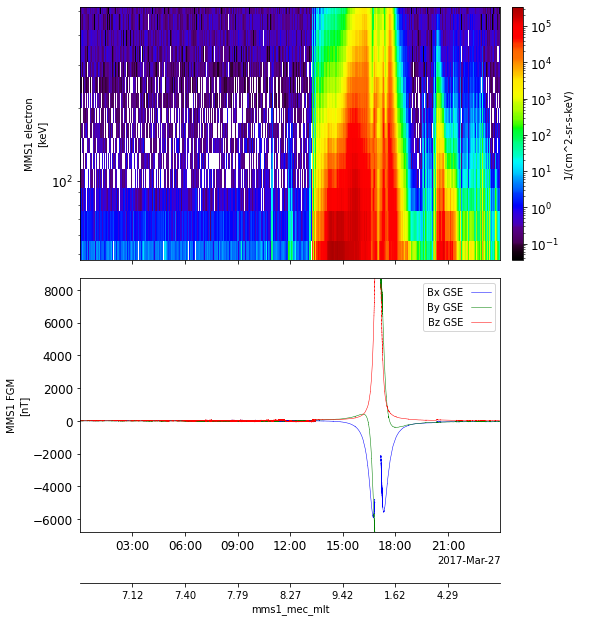

In [ ]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'], 
      var_label='mms1_mec_mlt')

You can remove the log scale from the color bar using the `zlog` option

In [ ]:
options('mms1_epd_feeps_srvy_l2_electron_intensity_omni', 'zlog', False)

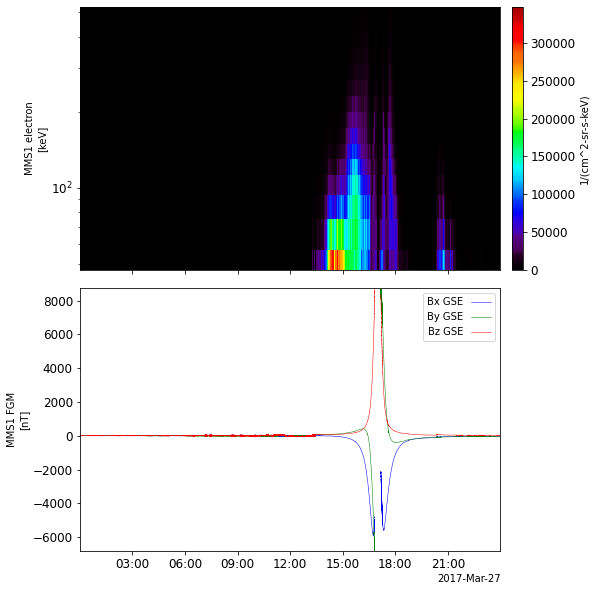

In [ ]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

To change the color bar, use the `Colormap` option

See the `matplotlib` documentation for a list of the available colormaps:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

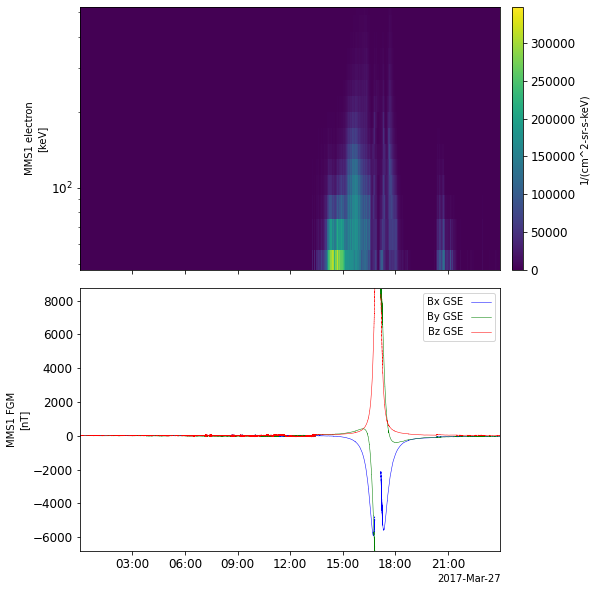

In [ ]:
options('mms1_epd_feeps_srvy_l2_electron_intensity_omni', 'Colormap', 'viridis')

tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

To access the data values for a spectrogram:

In [ ]:
spec = get_data('mms1_epd_feeps_srvy_l2_electron_intensity_omni')

Just like before, the time values are stored in `.times`

In [ ]:
spec.times

array([1.49057280e+09, 1.49057280e+09, 1.49057281e+09, ...,
       1.49065919e+09, 1.49065920e+09, 1.49065920e+09])

The data values are stored in `.y`

In [ ]:
spec.y

array([[ 4.97902753,  1.98800863,  0.69065768, ...,  0.25102128,
         0.48059046,  0.        ],
       [ 6.7282928 ,  0.67817921,  0.4923653 , ...,  0.23810947,
         0.57151589,  0.37946984],
       [ 2.0316498 ,  1.56090032,  0.68453224, ...,  0.38966605,
         0.19402831,  0.27134878],
       ...,
       [31.46374872,  7.94453411,  2.14239113, ...,  0.48141532,
         0.56352265,  0.29578649],
       [29.90572155,  5.5448737 ,  3.02225186, ...,  0.20759662,
         0.29994117,  0.45473195],
       [24.02912151,  7.03102523,  1.09121808, ...,  0.22004037,
         0.60353759,  0.44419134]])

The energy table is stored in `.v`

In [ ]:
spec.v

array([ 47.2,  65.9,  84.6, 103.4, 121.1, 139.2, 160.5, 185.3, 214.2,
       248. , 287.4, 333.4, 387.2, 450. , 523.2])

If you have tplot variables that are a function of energy and angle (e.g., distribution functions), the energy/angle tables are stored as `.v1`, `v2` and `v3`

## Cluster

To load the magnetic field data from Cluster

In [ ]:
pyspedas.cluster.fgm(trange=trange)

12-May-22 19:24:36: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c1/up/fgm/2017/
12-May-22 19:24:37: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf to cluster_data/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf
12-May-22 19:24:37: Download complete: cluster_data/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf


['Epoch__C1_UP_FGM',
 'Status__C1_UP_FGM',
 'B_xyz_gse__C1_UP_FGM',
 'B_nsigma_t__C1_UP_FGM',
 'B_nsigma_b__C1_UP_FGM']

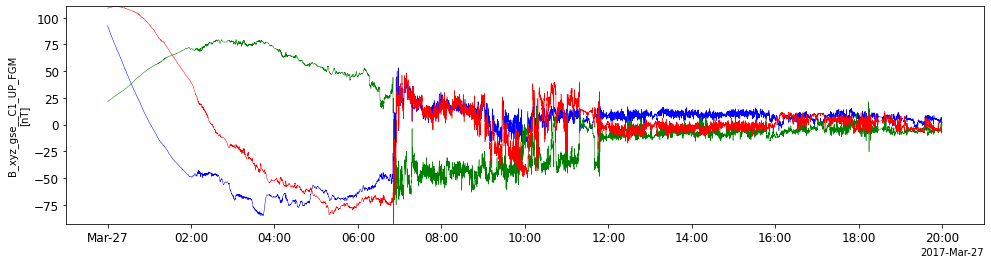

In [ ]:
tplot('B_xyz_gse__C1_UP_FGM', xsize=15, ysize=4)

We have routines for common operations with vector data, e.g., to calculate the dot product and the cross product of 2 vectors:

In [ ]:
from pyspedas import tdotp

tdotp('B_xyz_gse__C1_UP_FGM', 'B_xyz_gse__C1_UP_FGM')

'B_xyz_gse__C1_UP_FGM_dot_B_xyz_gse__C1_UP_FGM'

In [ ]:
from pyspedas import tcrossp

tcrossp('B_xyz_gse__C1_UP_FGM', 'B_xyz_gse__C1_UP_FGM')

'B_xyz_gse__C1_UP_FGM_cross_B_xyz_gse__C1_UP_FGM'

Now set some plot metadata and create the figure

12-May-22 19:24:38: /usr/local/lib/python3.7/dist-packages/pytplot/MPLPlotter/tplot.py:230: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  this_axis.set_ylim(yrange)



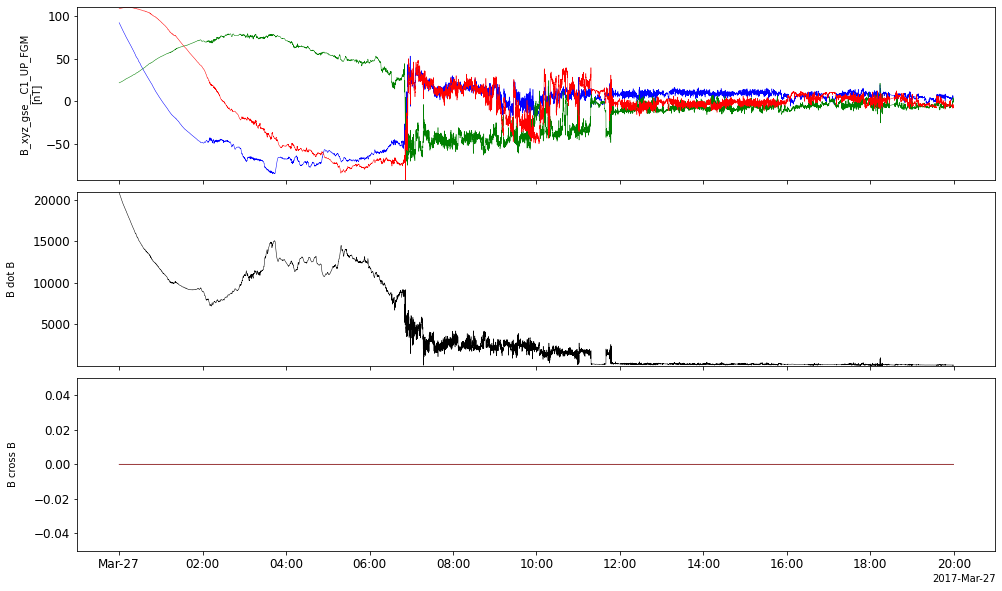

In [ ]:
options('B_xyz_gse__C1_UP_FGM_dot_B_xyz_gse__C1_UP_FGM', 'ytitle', 'B dot B')
options('B_xyz_gse__C1_UP_FGM_cross_B_xyz_gse__C1_UP_FGM', 'ytitle', 'B cross B')

tplot(['B_xyz_gse__C1_UP_FGM',
       'B_xyz_gse__C1_UP_FGM_dot_B_xyz_gse__C1_UP_FGM',
       'B_xyz_gse__C1_UP_FGM_cross_B_xyz_gse__C1_UP_FGM'],
      xsize=15, ysize=10)

## Time History of Events and Macroscale Interactions during Substorms (THEMIS)

To load the state data for THEMIS:

In [ ]:
pyspedas.themis.state(probe='d', trange=trange)

12-May-22 19:24:40: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l1/state/2017/thd_l1_state_20170327.cdf to themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
12-May-22 19:24:40: Download complete: themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf


['thd_pos',
 'thd_vel',
 'thd_spin_initial_delta_phi',
 'thd_spin_idpu_spinper',
 'thd_spin_segflags',
 'thd_spin_ecl_initial_delta_phi',
 'thd_spin_ecl_idpu_spinper',
 'thd_spin_ecl_segflags',
 'thd_pos_gse',
 'thd_pos_gsm',
 'thd_vel_gse',
 'thd_vel_gsm',
 'thd_pos_sel',
 'thd_pos_sse',
 'thd_vel_sel',
 'thd_vel_sse']

Load the THEMIS magnetic field data:

In [ ]:
pyspedas.themis.fgm(probe='d', trange=trange)

12-May-22 19:24:40: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/
12-May-22 19:24:41: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf to themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
12-May-22 19:24:45: Download complete: themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf


['thd_fgs_btotal',
 'thd_fgs_gse',
 'thd_fgs_gsm',
 'thd_fgs_dsl',
 'thd_fgl_btotal',
 'thd_fgl_gse',
 'thd_fgl_gsm',
 'thd_fgl_dsl',
 'thd_fgl_ssl',
 'thd_fgh_btotal',
 'thd_fgh_gse',
 'thd_fgh_gsm',
 'thd_fgh_dsl',
 'thd_fgh_ssl',
 'thd_fge_btotal',
 'thd_fge_gse',
 'thd_fge_gsm',
 'thd_fge_dsl',
 'thd_fge_ssl']

And load the particle data from the Electrostatic Analyzer (ESA)

In [ ]:
pyspedas.themis.esa(probe='d', trange=trange)

12-May-22 19:24:51: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/esa/2017/
12-May-22 19:24:51: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l2/esa/2017/thd_l2_esa_20170327_v01.cdf to themis_data/thd/l2/esa/2017/thd_l2_esa_20170327_v01.cdf
12-May-22 19:24:52: Download complete: themis_data/thd/l2/esa/2017/thd_l2_esa_20170327_v01.cdf


['thd_peif_data_quality',
 'thd_peef_data_quality',
 'thd_peir_data_quality',
 'thd_peer_data_quality',
 'thd_peib_data_quality',
 'thd_peeb_data_quality',
 'thd_peif_density',
 'thd_peif_avgtemp',
 'thd_peif_vthermal',
 'thd_peif_sc_pot',
 'thd_peif_en_eflux',
 'thd_peif_t3',
 'thd_peif_magt3',
 'thd_peif_ptens',
 'thd_peif_mftens',
 'thd_peif_flux',
 'thd_peif_symm',
 'thd_peif_symm_ang',
 'thd_peif_magf',
 'thd_peif_velocity_dsl',
 'thd_peif_velocity_gse',
 'thd_peif_velocity_gsm',
 'thd_peef_density',
 'thd_peef_avgtemp',
 'thd_peef_vthermal',
 'thd_peef_sc_pot',
 'thd_peef_en_eflux',
 'thd_peef_t3',
 'thd_peef_magt3',
 'thd_peef_ptens',
 'thd_peef_mftens',
 'thd_peef_flux',
 'thd_peef_symm',
 'thd_peef_symm_ang',
 'thd_peef_magf',
 'thd_peef_velocity_dsl',
 'thd_peef_velocity_gse',
 'thd_peef_velocity_gsm',
 'thd_peir_density',
 'thd_peir_avgtemp',
 'thd_peir_vthermal',
 'thd_peir_sc_pot',
 'thd_peir_en_eflux',
 'thd_peir_t3',
 'thd_peir_magt3',
 'thd_peir_ptens',
 'thd_peir_mften

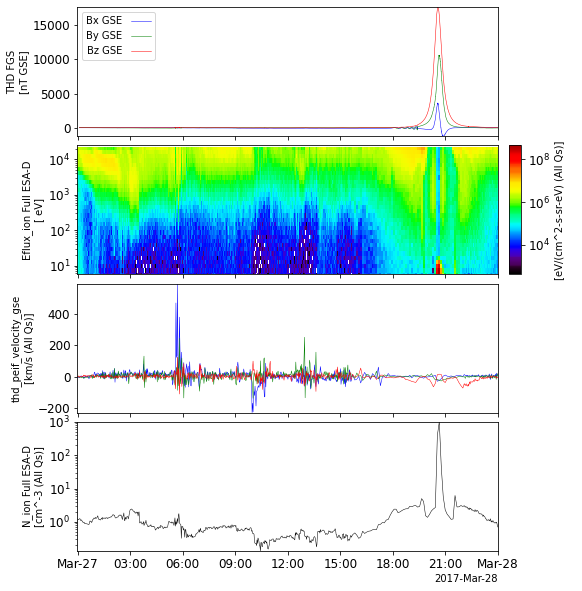

In [ ]:
tplot(['thd_fgs_gse', 'thd_peif_en_eflux', 'thd_peif_velocity_gse', 'thd_peif_density'])

You can easily do various plasma calculations with plasmapy, e.g., to calculate the upper hybrid frequency:

In [ ]:
!pip install plasmapy

     |████████████████████████████████| 8.7 MB 5.4 MB/s 


12-May-22 19:25:10: /usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/plasmapy-0.7.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):



In [ ]:
import plasmapy

First, we'll need to interpolate the B-field to the particle data time stamps for THEMIS

In [ ]:
from pyspedas import tinterpol

tinterpol('thd_fgs_btotal', 'thd_peef_density')

tinterpol (linear) was applied to: thd_fgs_btotal-itrp


Now get the data/time values as `numpy` arrays

In [ ]:
bfield = get_data('thd_fgs_btotal-itrp')
electron_n = get_data('thd_peef_density')

Add units using astropy

In [ ]:
from astropy import units as u

B = bfield.y * u.nT
n_e = electron_n.y * u.cm**-3

Now we can calculate the upper hybrid frequency:

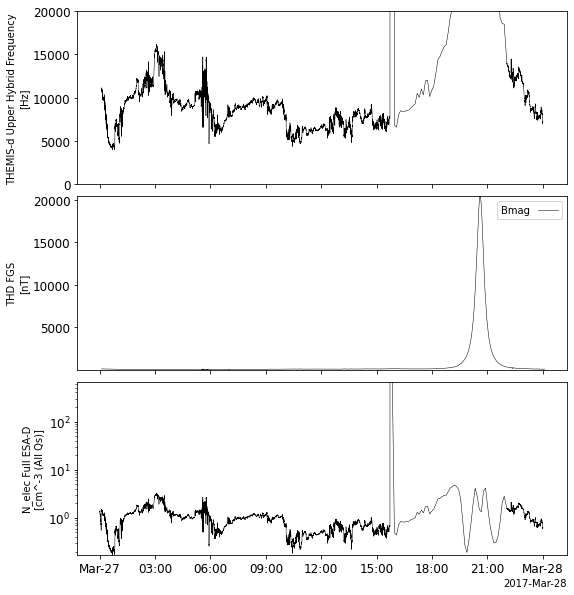

In [ ]:
omega_uh = plasmapy.formulary.parameters.upper_hybrid_frequency(B, n_e, to_hz=True)

store_data('omega_uh', data={'x': bfield.times, 'y': omega_uh})

options('omega_uh', 'ytitle', 'THEMIS-d Upper Hybrid Frequency')
options('omega_uh', 'ysubtitle', '[' + str(omega_uh.unit) + ']')
options('omega_uh', 'yrange', [0, 20000])

tplot(['omega_uh', 'thd_fgs_btotal', 'thd_peef_density'])

## Van Allen Probes (RBSP)

Load data from the Electric and Magnetic Field Instrument Suite and Integrated Science (EMFISIS) and Electric Field and Waves Suite (EFW)

In [ ]:
pyspedas.rbsp.emfisis(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                                     datatype='magnetometer', 
                                     level='l3', 
                                     time_clip=True)
pyspedas.rbsp.efw(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                             level='l3',
                             time_clip=True)

12-May-22 19:25:13: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/
12-May-22 19:25:14: Downloading https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf to rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
12-May-22 19:25:14: Download complete: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf


Time clip was applied to: Mag
Time clip was applied to: Magnitude
Time clip was applied to: delta
Time clip was applied to: lambda


12-May-22 19:25:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/


Time clip was applied to: rms
Time clip was applied to: coordinates


12-May-22 19:25:16: Downloading https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf to rbsp_data/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf
12-May-22 19:25:16: Download complete: rbsp_data/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf
12-May-22 19:25:16: /usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)



Time clip was applied to: VxB_efield_of_earth_mgse
Time clip was applied to: efield_in_inertial_frame_spinfit_mgse
Time clip was applied to: efield_in_corotation_frame_spinfit_mgse
Time clip was applied to: efield_in_inertial_frame_spinfit_edotb_mgse
Time clip was applied to: efield_in_corotation_frame_spinfit_edotb_mgse
Time clip was applied to: spacecraft_potential
Time clip was applied to: density
Time clip was applied to: VscxB_motional_efield_mgse
Time clip was applied to: velocity_gse
Time clip was applied to: position_gse
Time clip was applied to: angle_spinplane_Bo
Time clip was applied to: mlt
Time clip was applied to: mlat
Time clip was applied to: lshell
Time clip was applied to: spinaxis_gse
Time clip was applied to: global_flag
Time clip was applied to: flags_all
Time clip was applied to: bias_current
Time clip was applied to: flags_charging_bias_eclipse
Time clip was applied to: burst1_avail
Time clip was applied to: burst2_avail
Time clip returns empty data.


['VxB_efield_of_earth_mgse',
 'efield_in_inertial_frame_spinfit_mgse',
 'efield_in_corotation_frame_spinfit_mgse',
 'efield_in_inertial_frame_spinfit_edotb_mgse',
 'efield_in_corotation_frame_spinfit_edotb_mgse',
 'spacecraft_potential',
 'density',
 'VscxB_motional_efield_mgse',
 'velocity_gse',
 'position_gse',
 'angle_spinplane_Bo',
 'mlt',
 'mlat',
 'lshell',
 'spinaxis_gse',
 'global_flag',
 'flags_all',
 'bias_current',
 'flags_charging_bias_eclipse',
 'burst1_avail',
 'burst2_avail',
 'boom_pair_used']

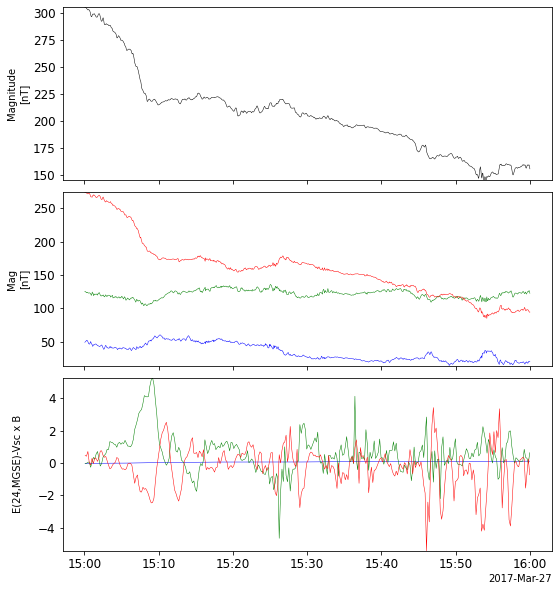

In [ ]:
tplot(['Magnitude', 'Mag', 'efield_in_inertial_frame_spinfit_mgse'])

You can calculate the ion gyrofrequency for this interval:

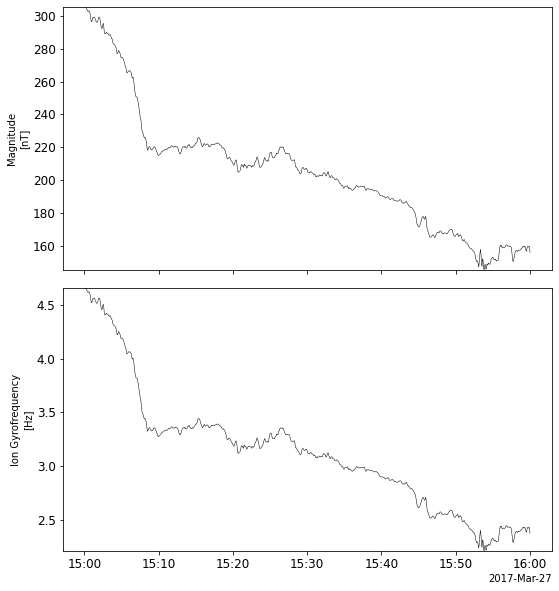

In [ ]:
mag = get_data('Magnitude')

# add units with astropy, just as before
B = mag.y * u.nT

omega_ci = plasmapy.formulary.parameters.gyrofrequency(B, 'p', to_hz=True)

store_data('omega_ci', data={'x': mag.times, 'y': omega_ci})

options('omega_ci', 'ytitle', 'Ion Gyrofrequency')
options('omega_ci', 'ysubtitle', '[Hz]')

tplot(['Magnitude', 'omega_ci'])

## Arase

To load the Arase orbit data, magnetic field data, medium-energy Particles - electrons (MEP-e), low-energy Particles – electrons (LEP-e)

In [ ]:
pyspedas.erg.orb(trange=trange)
pyspedas.erg.mgf(trange=trange)
pyspedas.erg.mepe(trange=trange)
pyspedas.erg.lepe(trange=trange)

12-May-22 19:25:20: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
12-May-22 19:25:21: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf to erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-May-22 19:25:22: Download complete: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-May-22 19:25:22: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-May-22 19:25:22: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

12-May-22 19:25:23: Downloading rem

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-May-22 19:25:25: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf to erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-May-22 19:25:26: Download complete: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-May-22 19:25:26: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-May-22 19:25:26: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-May-22 19:25:27: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/
12-May-22 19:25:28: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf to erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
12-May-22 19:25:28: Download complete: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
12-May-22 19:25:28: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-May-22 19:25:28: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


12-May-22 19:25:29: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf to erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf
12-May-22 19:25:30: Download complete: erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data

Information about ERG LEPe

PI:  Shiang-Yu Wang
Affiliation: Academia Sinica, Taiwan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_lepe_l2_omniflux_FEDO']

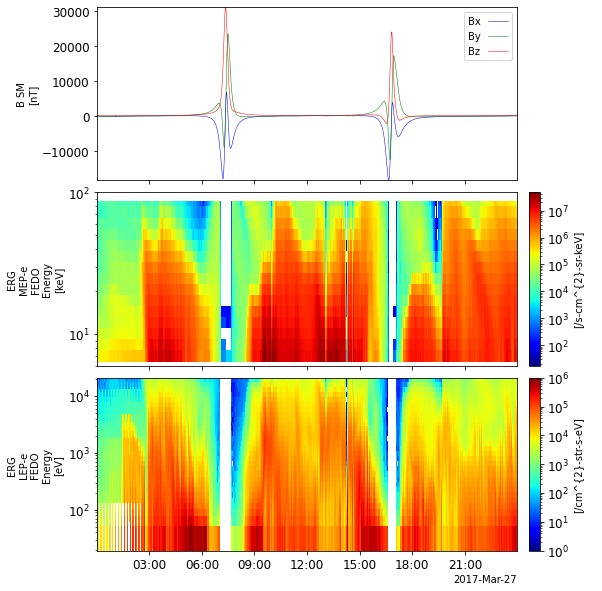

In [ ]:
tplot(['erg_mgf_l2_mag_8sec_sm', 
       'erg_mepe_l2_omniflux_FEDO', 
       'erg_lepe_l2_omniflux_FEDO'])

## Geopack (Tsyganenko field models)

You can generate magnetic field models at position vectors using the routines: `tt89`, `tt96`, `tt01`, and `tts04`

For example, to calculate the T89 model at MMS, THEMIS, and Arase:

In [ ]:
from pyspedas.geopack import tt89

# convert the Arase position data to km (from Re)
from pyspedas import tkm2re
tkm2re('erg_orb_l2_pos_gsm', km=True)

tt89('mms1_mec_r_gsm')
tt89('thd_pos_gsm')
tt89('erg_orb_l2_pos_gsm_km')

Load IGRF coefficients ...


'erg_orb_l2_pos_gsm_km_bt89'

Plot the model field along with the measured fields

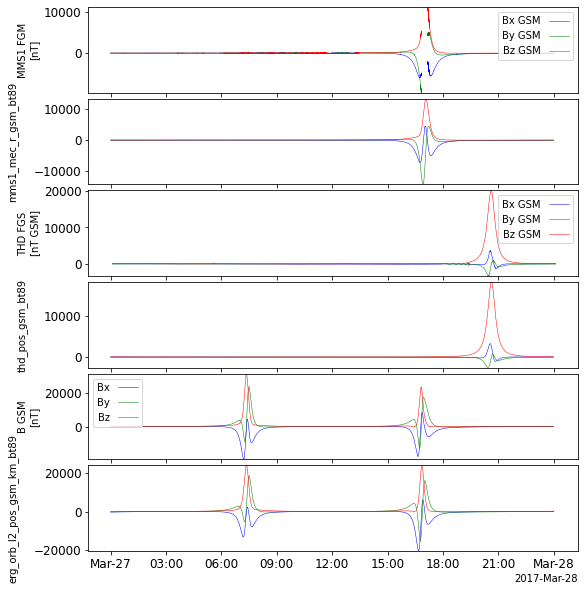

In [ ]:
tplot(['mms1_fgm_b_gsm_srvy_l2_bvec', # MMS measured field
       'mms1_mec_r_gsm_bt89', # T89 at the MMS1 position
       'thd_fgs_gsm', # THEMIS measured field
       'thd_pos_gsm_bt89', # T89 at the THEMIS-c position
       'erg_mgf_l2_mag_8sec_gsm', # ERG measured field
       'erg_orb_l2_pos_gsm_km_bt89']) # T89 at the ERG position

## Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)

To load the TWINS Lyman-alpha and ephemeris data:

In [ ]:
pyspedas.twins.lad(trange=trange)
pyspedas.twins.ephemeris(trange=trange)

12-May-22 19:26:08: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/
12-May-22 19:26:09: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf to twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
12-May-22 19:26:09: Download complete: twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
12-May-22 19:26:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/
12-May-22 19:26:10: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf to twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf
12-May-22 19:26:10: Download complete: twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf


['ISTARTTIMEMJD',
 'FSCECI',
 'FSCGEO',
 'FSCGSM',
 'FSCECD',
 'FSCLONGGEO',
 'FSCLATGEO',
 'FSCRADIALDIST',
 'FSCRADIALALT',
 'FSUNECI',
 'FBECI',
 'FBMIRROR',
 'FBEQUATORIAL',
 'FBNORTH100KM',
 'FBSOUTH100KM',
 'FMIRRORGSM',
 'FEQUATORIALGSM',
 'FNORTH100KMGSM',
 'FSOUTH100KMGSM',
 'FLSHELL',
 'FINVLAT',
 'FDIPOLERADIUS',
 'FDIPOLELAT',
 'FSCLATECD',
 'FLTGEO',
 'FLTECD',
 'FLTEQU',
 'FSOLARZENITHCOS',
 'FLOSSCONE',
 'FDIPOLETILT',
 'FDIPOLEOFFSET']

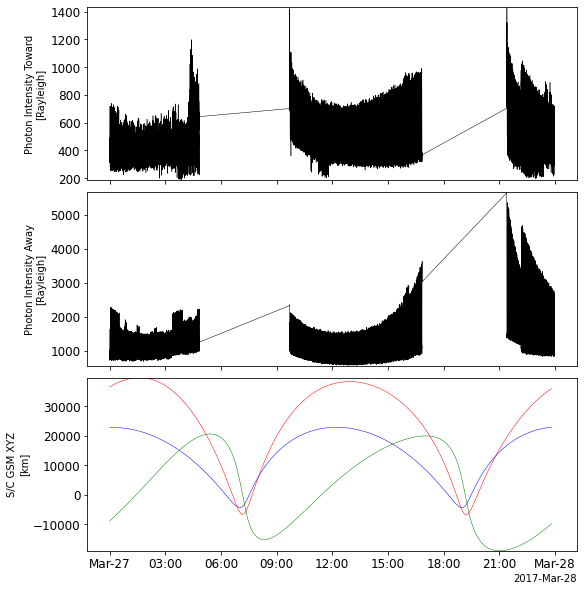

In [ ]:
tplot(['lad1_data', 'lad2_data', 'FSCGSM'])

To change the size of one of the panels, use the `panel_size` option, e.g., 

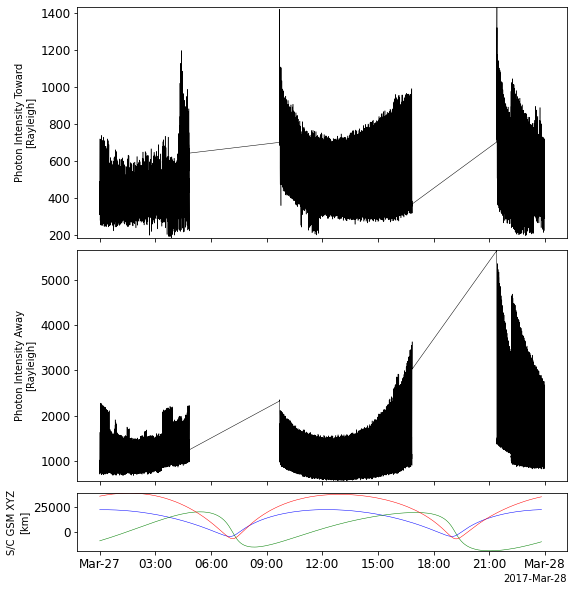

In [ ]:
options('FSCGSM', 'panel_size', 0.25)

tplot(['lad1_data', 'lad2_data', 'FSCGSM'])

You can use `tplot_options` to change figure-level options, e.g., to add a title to the figure, and adjust the margins:

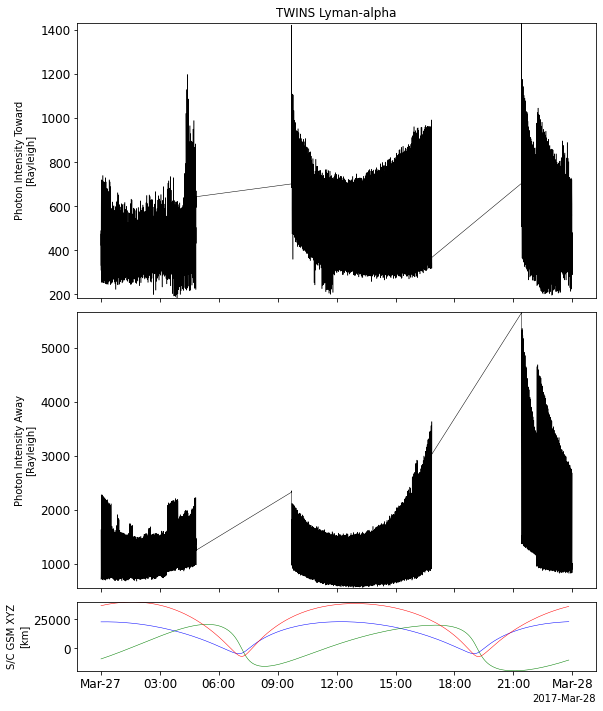

In [ ]:
from pytplot import tplot_options

tplot_options('title', 'TWINS Lyman-alpha')
tplot_options('xmargin', [0.05, 0.05])
tplot_options('ymargin', [0.05, 0.05])

tplot(['lad1_data', 'lad2_data', 'FSCGSM'])

You'll have to change these back to their defaults if you don't want them to persist for subsequent figures

In [ ]:
tplot_options('title', '')
tplot_options('xmargin', [0.1, 0.1])
tplot_options('ymargin', [0.1, 0.1])

## Polar Operational Environmental Satellites (POES)

To load data from the POES Space Environment Monitor (SEM):

In [ ]:
pyspedas.poes.sem(trange=['2017-03-27', '2017-03-28'])

12-May-22 19:26:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/
12-May-22 19:26:14: Downloading https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf to poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf
12-May-22 19:26:15: Download complete: poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf


['ted_ele_tel0_low_eflux',
 'ted_ele_tel30_low_eflux',
 'ted_ele_tel0_low_eflux_error',
 'ted_ele_tel30_low_eflux_error',
 'ted_ele_tel0_hi_eflux',
 'ted_ele_tel30_hi_eflux',
 'ted_ele_tel0_hi_eflux_error',
 'ted_ele_tel30_hi_eflux_error',
 'ted_pro_tel0_low_eflux',
 'ted_pro_tel30_low_eflux',
 'ted_pro_tel0_low_eflux_error',
 'ted_pro_tel30_low_eflux_error',
 'ted_pro_tel0_hi_eflux',
 'ted_pro_tel30_hi_eflux',
 'ted_pro_tel0_hi_eflux_error',
 'ted_pro_tel30_hi_eflux_error',
 'ted_ele_eflux_atmo_low',
 'ted_ele_eflux_atmo_hi',
 'ted_ele_eflux_atmo_low_err',
 'ted_ele_eflux_atmo_hi_err',
 'ted_ele_eflux_atmo_total',
 'ted_ele_eflux_atmo_total_err',
 'ted_pro_eflux_atmo_low',
 'ted_pro_eflux_atmo_hi',
 'ted_pro_eflux_atmo_low_err',
 'ted_pro_eflux_atmo_hi_err',
 'ted_pro_eflux_atmo_total',
 'ted_pro_eflux_atmo_total_err',
 'ted_total_eflux_atmo',
 'ted_total_eflux_atmo_err',
 'ted_ele_energy_tel0',
 'ted_ele_energy_tel30',
 'ted_pro_energy_tel0',
 'ted_pro_energy_tel30',
 'ted_ele_max_fl

You can turn off the log scale on the y-axis using the `ylog` option

In [ ]:
options('ted_pro_tel0_low_eflux', 'ylog', False)
options('ted_pro_tel30_low_eflux', 'ylog', False)

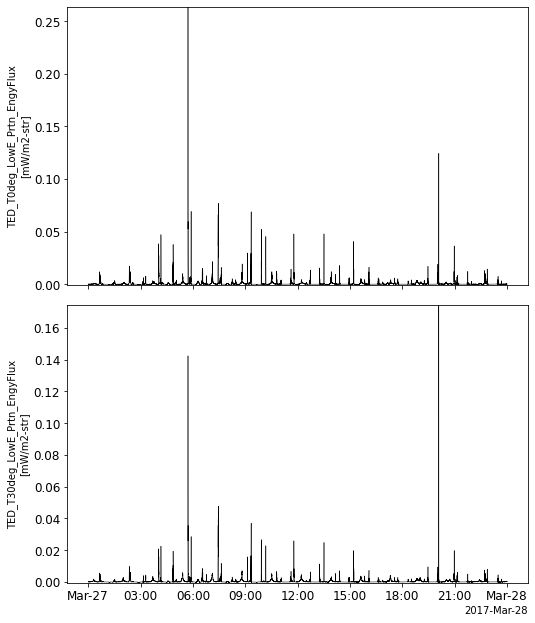

In [ ]:
tplot('ted_pro_tel*_low_eflux')

You can change the size of the y-title using the `charsize` option

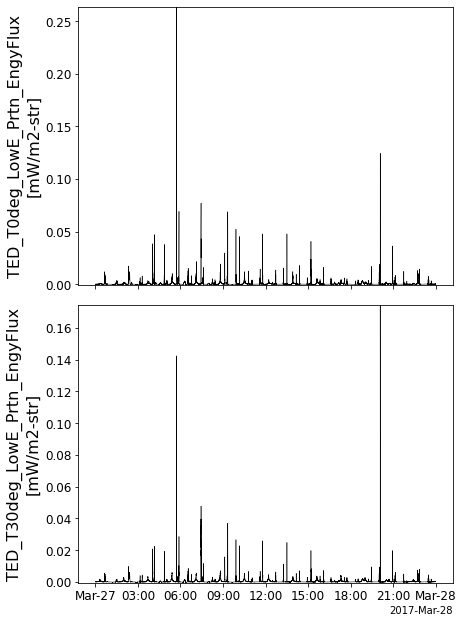

In [ ]:
options('ted_pro_tel0_low_eflux', 'charsize', 16)
options('ted_pro_tel30_low_eflux', 'charsize', 16)

tplot('ted_pro_tel*_low_eflux')

You can change the font size of the axes using the `axis_font_size` option

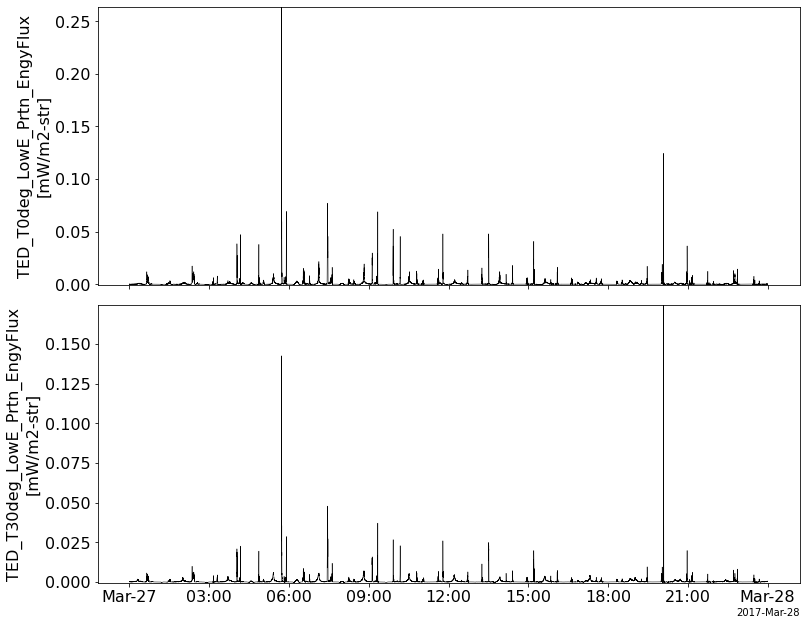

In [ ]:
tplot_options('axis_font_size', 16)

tplot('ted_pro_tel*_low_eflux', xsize=15)

Reset the axis font size

In [ ]:
tplot_options('axis_font_size', 12)

## Swarm data using HAPI

You can load Swarm magnetic field data from the Swarm HAPI server using `pyspedas.swarm.mag`

Note: the Swarm routine should make a good template for missions planning to distribute their data using HAPI

In [ ]:
pyspedas.swarm.mag(probe='a', 
                   trange=['2017-03-27/06:00', '2017-03-27/08:00'], 
                   datatype='hr')

Loading swarma_Latitude
Loading swarma_Longitude
Loading swarma_Radius
Loading swarma_B_VFM
Loading swarma_B_NEC
Loading swarma_dB_Sun
Loading swarma_dB_AOCS
Loading swarma_dB_other
Loading swarma_B_error
Loading swarma_q_NEC_CRF
Loading swarma_Att_error
Loading swarma_Flags_B
Loading swarma_Flags_q
Loading swarma_Flags_Platform
Loading swarma_SyncStatus


['swarma_Latitude',
 'swarma_Longitude',
 'swarma_Radius',
 'swarma_B_VFM',
 'swarma_B_NEC',
 'swarma_dB_Sun',
 'swarma_dB_AOCS',
 'swarma_dB_other',
 'swarma_B_error',
 'swarma_q_NEC_CRF',
 'swarma_Att_error',
 'swarma_Flags_B',
 'swarma_Flags_q',
 'swarma_Flags_Platform',
 'swarma_SyncStatus']

Plot the Swarm magnetic field data, along with the longitude and latitude as additional x-axes

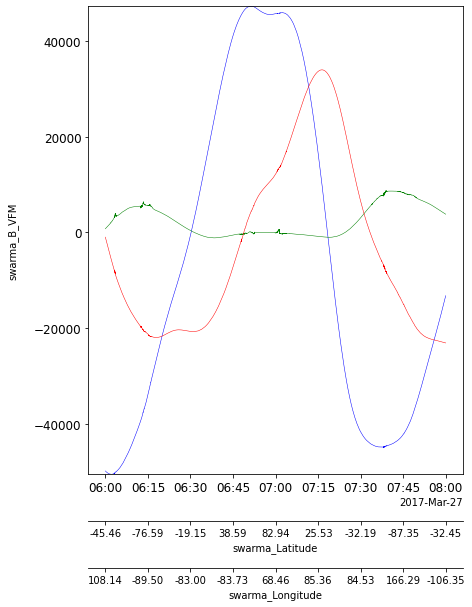

In [ ]:
tplot('swarma_B_VFM', var_label=['swarma_Latitude', 'swarma_Longitude'])

## THEMIS All Sky Imager data

To load data from the THEMIS All Sky Imager:

In [ ]:
pyspedas.themis.ask(trange=trange)

12-May-22 19:29:18: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf to themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf
12-May-22 19:29:24: Download complete: themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf


['thg_ask_atha',
 'thg_ask_chbg',
 'thg_ask_fsmi',
 'thg_ask_fsim',
 'thg_ask_fykn',
 'thg_ask_gako',
 'thg_ask_gbay',
 'thg_ask_gill',
 'thg_ask_inuv',
 'thg_ask_kapu',
 'thg_ask_kian',
 'thg_ask_mcgr',
 'thg_ask_kuuj',
 'thg_ask_pina',
 'thg_ask_snkq',
 'thg_ask_tpas',
 'thg_ask_whit',
 'thg_ask_talo']

Plot the keograms

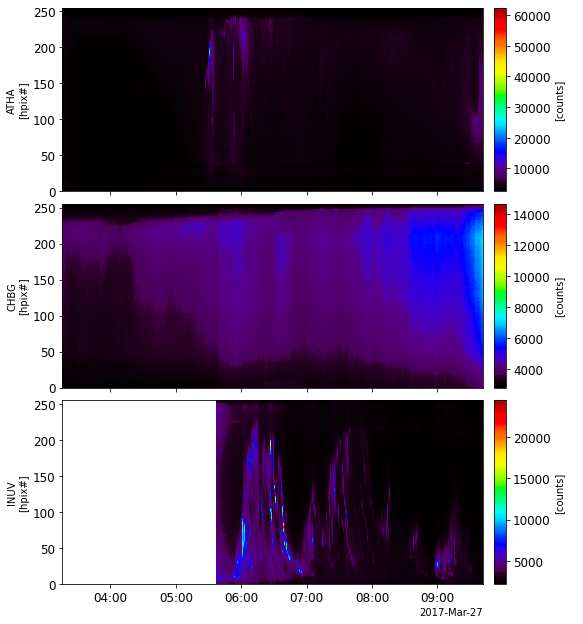

In [ ]:
tplot(['thg_ask_atha', 'thg_ask_chbg', 'thg_ask_inuv'])

## Ground magnetometer data

To load data from the THEMIS ground magnetometer network:


In [ ]:
pyspedas.themis.gmag(trange=trange)

12-May-22 19:29:31: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/
12-May-22 19:29:31: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf to themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
12-May-22 19:29:32: Download complete: themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
12-May-22 19:29:32: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/
12-May-22 19:29:32: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf to themis_data/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf
12-May-22 19:29:32: Download complete: themis_data/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf
12-May-22 19:29:32: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/ekat/2017/
12-May-22 19:29:33: Remote index not found: http://themis.ssl

['thg_mag_amd',
 'thg_mag_atha',
 'thg_mag_bbg',
 'thg_mag_blc',
 'thg_mag_bou',
 'thg_mag_brn',
 'thg_mag_brw',
 'thg_mag_bsl',
 'thg_mag_cbb',
 'thg_mag_ccnv',
 'thg_mag_cdrt',
 'thg_mag_chbg',
 'thg_mag_cigo',
 'thg_mag_cmo',
 'thg_mag_crvr',
 'thg_mag_ded',
 'thg_mag_dik',
 'thg_mag_frd',
 'thg_mag_frn',
 'thg_mag_fsim',
 'thg_mag_fsmi',
 'thg_mag_fykn',
 'thg_mag_gbay',
 'thg_mag_gill',
 'thg_mag_gjoa',
 'thg_mag_gua',
 'thg_mag_han',
 'thg_mag_hon',
 'thg_mag_hris',
 'thg_mag_iglo',
 'thg_mag_inuk',
 'thg_mag_inuv',
 'thg_mag_iqa',
 'thg_mag_iva',
 'thg_mag_kako',
 'thg_mag_kev',
 'thg_mag_kian',
 'thg_mag_kil',
 'thg_mag_kjpk',
 'thg_mag_kuuj',
 'thg_mag_leth',
 'thg_mag_loz',
 'thg_mag_lrel',
 'thg_mag_mas',
 'thg_mag_mea',
 'thg_mag_mek',
 'thg_mag_muo',
 'thg_mag_nain',
 'thg_mag_new',
 'thg_mag_nur',
 'thg_mag_ott',
 'thg_mag_ouj',
 'thg_mag_pang',
 'thg_mag_pbk',
 'thg_mag_pel',
 'thg_mag_pgeo',
 'thg_mag_pina',
 'thg_mag_pokr',
 'thg_mag_puvr',
 'thg_mag_radi',
 'thg_mag_r

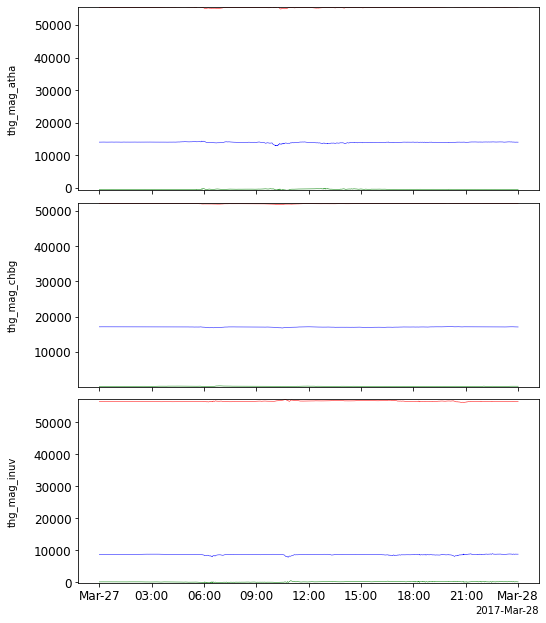

In [ ]:
tplot(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'])

Subtract the median from the ground magnetometer data

In [ ]:
from pyspedas import subtract_median

subtract_median(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv', 'thg_mag_pina'])

thg_mag_atha copied to thg_mag_atha-m
Subtract Median was applied to: thg_mag_atha-m
thg_mag_chbg copied to thg_mag_chbg-m
Subtract Median was applied to: thg_mag_chbg-m
thg_mag_inuv copied to thg_mag_inuv-m
Subtract Median was applied to: thg_mag_inuv-m
thg_mag_pina copied to thg_mag_pina-m
Subtract Median was applied to: thg_mag_pina-m


Update the y-axis range and re-plot:

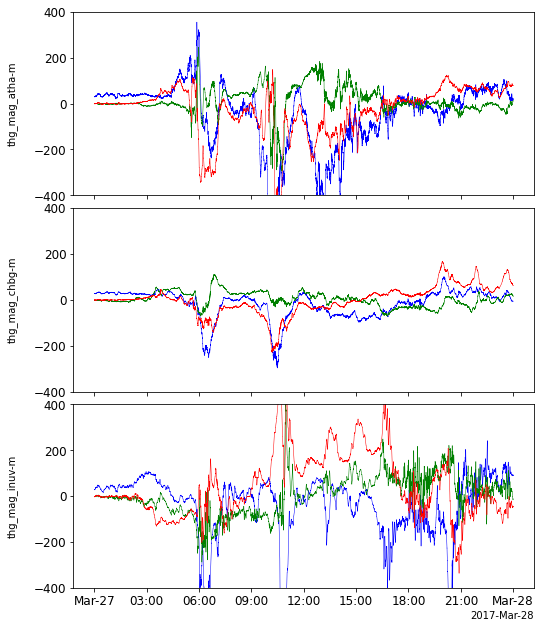

In [ ]:
options('thg_mag_atha-m', 'yrange', [-400, 400])
options('thg_mag_chbg-m', 'yrange', [-400, 400])
options('thg_mag_inuv-m', 'yrange', [-400, 400])
options('thg_mag_pina-m', 'yrange', [-400, 400])

tplot(['thg_mag_atha-m', 'thg_mag_chbg-m', 'thg_mag_inuv-m'])

## Magnetic Induction Coil Array (MICA)

To load the Magnetic Induction Coil Array (MICA) for the NAL station:

In [ ]:
pyspedas.mica.induction(site='NAL', trange=trange)

12-May-22 19:31:06: Downloading remote index: http://mirl.unh.edu/ULF/cdf/NAL/2017/03/
12-May-22 19:31:06: Downloading http://mirl.unh.edu/ULF/cdf/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf to mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf
12-May-22 19:31:07: Download complete: mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf


['dbdt_x_NAL',
 'dbdt_y_NAL',
 'spectra_x_1Hz_NAL',
 'spectra_y_1Hz_NAL',
 'spectra_x_5Hz_NAL',
 'spectra_y_5Hz_NAL']

Plot the 1 Hz data:

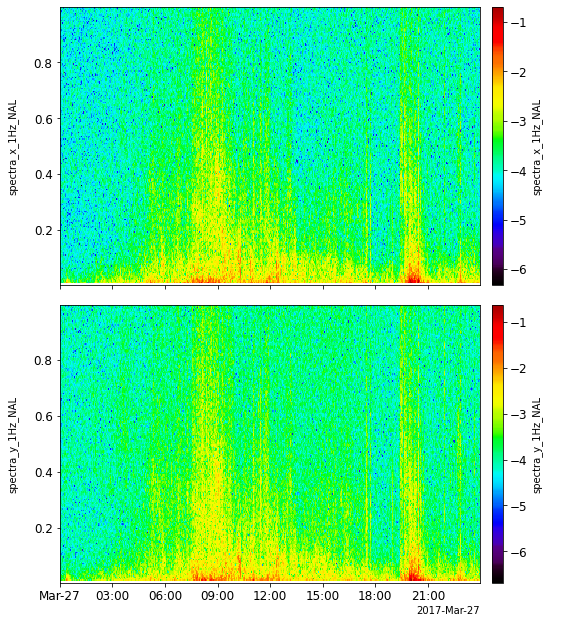

In [ ]:
tplot('spectra_?_1Hz_NAL')

Plot the keogram and B-field with the median subtracted

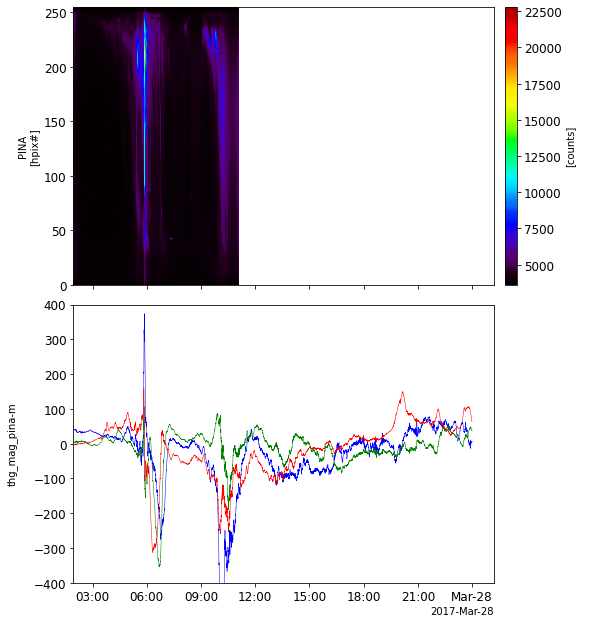

In [ ]:
tplot(['thg_ask_pina', 'thg_mag_pina-m'])

To quickly zoom into a time range, use `tlimit` from `pytplot`

In [ ]:
from pytplot import tlimit

tlimit(['2017-03-27 03:00:00', '2017-03-27 11:00:00'])

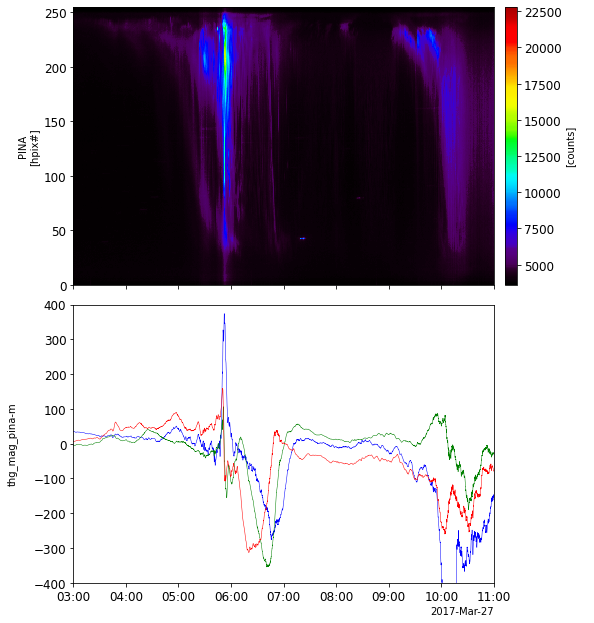

In [ ]:
tplot(['thg_ask_pina', 'thg_mag_pina-m'])

To change the z-axis (colorbar) range:

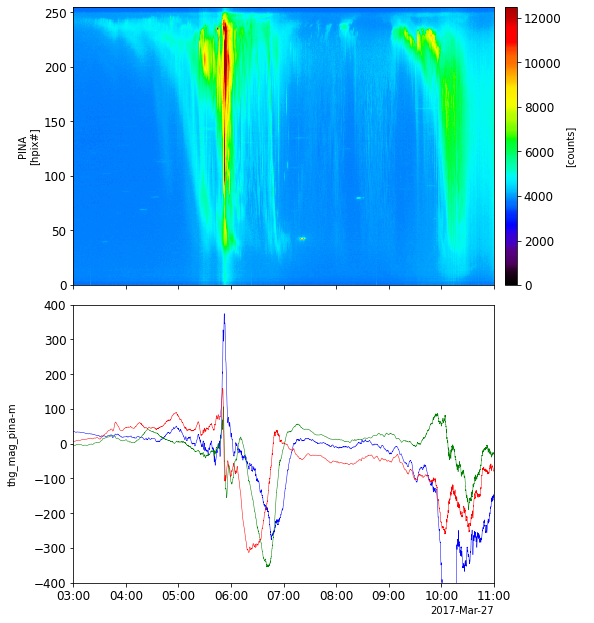

In [ ]:
options('thg_ask_pina', 'zrange', [0, 12500])

tplot(['thg_ask_pina', 'thg_mag_pina-m'])

To plot a line over a spectrogram, with axes on both sides of the figure:

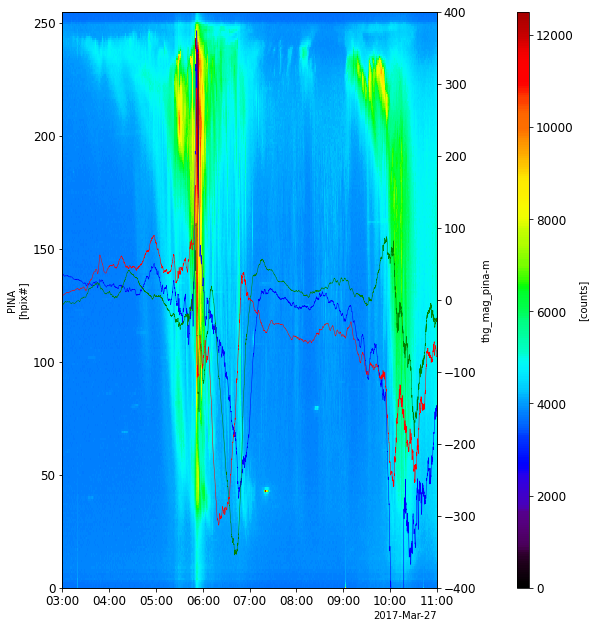

In [ ]:
store_data('overplot', data='thg_ask_pina thg_mag_pina-m')

options('overplot', 'right_axis', True)
tplot_options('xmargin', [0.1, 0.25])

tplot('overplot')

To change the thickness of a line plot, use the `thick` option

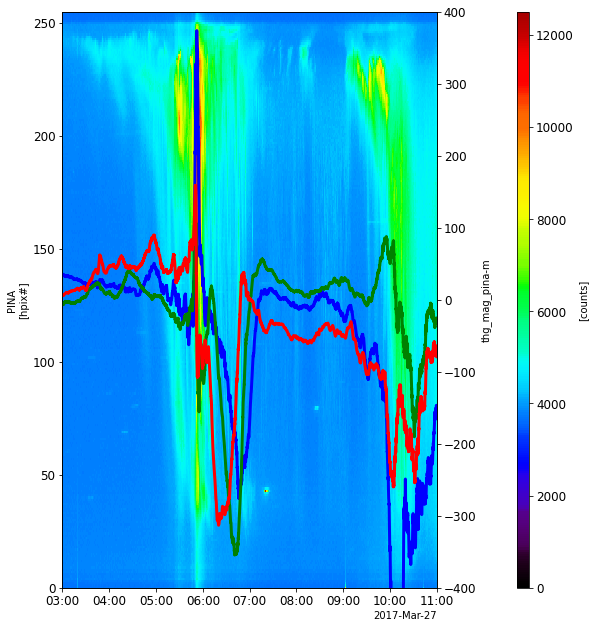

In [ ]:
options('thg_mag_pina-m', 'thick', 3)

tplot('overplot')

You can also change the line style using the `linestyle` option:

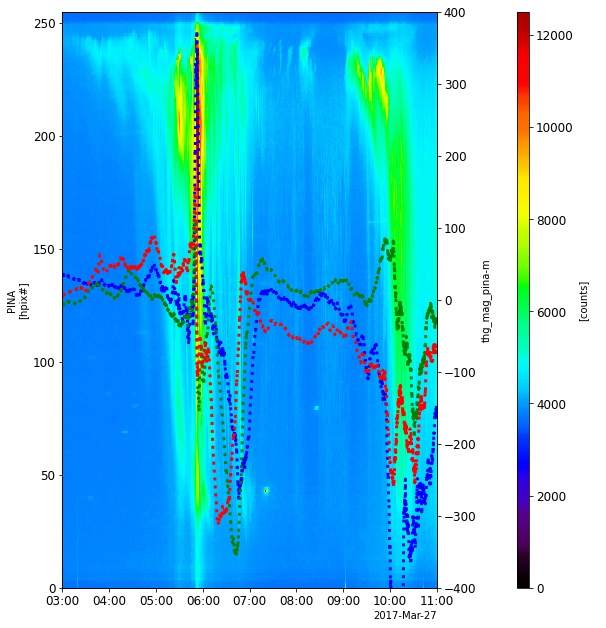

In [ ]:
options('thg_mag_pina-m', 'linestyle', 'dotted')

tplot('overplot')

You can save figures with the `tplot` keywords: `save_png`, `save_eps`, `save_svg`, and `save_pdf`

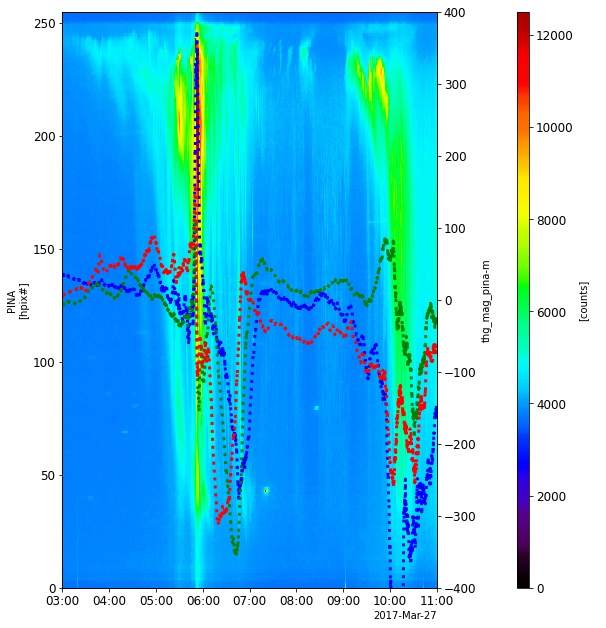

In [ ]:
tplot('overplot', save_png='overplot')

You can have full control over the figures and axes by returning the objects using the return_plot_objects keyword, e.g.,

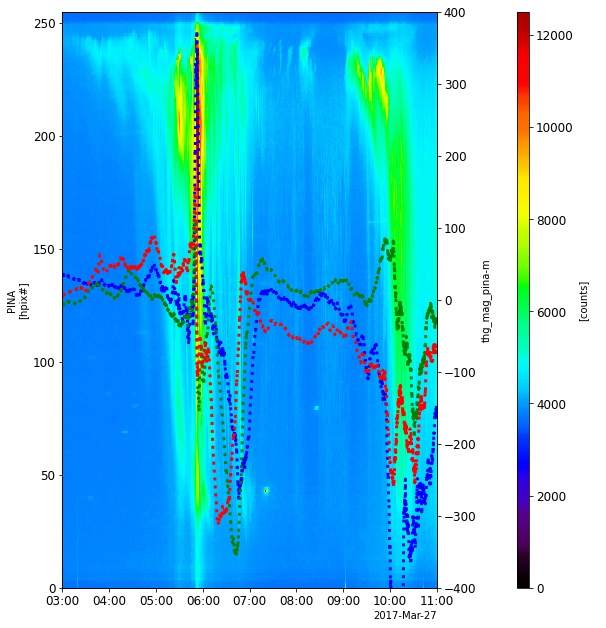

In [ ]:
fig, axes = tplot('overplot', return_plot_objects=True)

In [ ]:
axes

<AxesSubplot:ylabel='PINA\n[hpix#]'>

For example, to add some text to a figure:

In [ ]:
from datetime import datetime, timezone
import matplotlib

time = matplotlib.dates.date2num(datetime(2017, 3, 27, 3, 30, 0, tzinfo=timezone.utc))
axes.annotate('Your text', (time, 10), fontsize='x-large')

Text(17252.145833333332, 10, 'Your text')

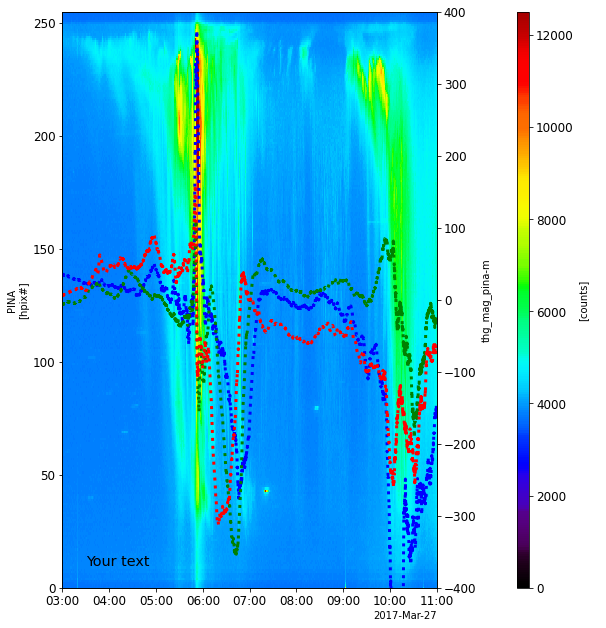

In [ ]:
fig

Reset the time range using `tlimit`:

In [ ]:
tlimit(full=True)